# URBAN ARTEFACTS

# 00 IMPORTS

In [1]:
from google.colab import drive

mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


In [2]:
!pip install osmnx 
!pip install -U bokeh==2.2
!pip install -q holoviews
!pip install momepy
!pip install Rtree
!pip install squarify
!pip install folium==0.12.1 mapclassify
!pip install contextily==1.0rc2
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 1.0 MB 18.2 MB/s 
     |████████████████████████████████| 62 kB 849 kB/s 
     |████████████████████████████████| 6.3 MB 22.7 MB/s 
     |████████████████████████████████| 1.0 MB 48.3 MB/s 
     |████████████████████████████████| 11.2 MB 32.5 MB/s 
     |████████████████████████████████| 16.7 MB 447 kB/s 
     |████████████████████████████████| 930 kB 52.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 4.4 MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.0-py3-none-any.whl size=9293544 sha256=ebed0a2bbe305e3f5eaff737508273f72656d13678a816498396c259b2ae5c8b
  Stored in directory: /root/.cache/pip/wheels/8f/a2/bd/664aed36d1ed60a74f6943ca0e57234eb8fd321dfc5c526630
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.2.0 which is incompatible.
     |████████████████████████████████| 10.7 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

In [3]:
import osmnx as ox 
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import momepy
from collections import Counter
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

from shapely.geometry import Polygon
from shapely.geometry import Point
import squarify
import folium
import contextily as cx
# Use k-means package from sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

Output hidden; open in https://colab.research.google.com to view.

In [4]:
import folium

# 01 DATA COLLECTION AND SORTING

## AMENITIES

Amenity count totals for each tile (1816 tiles + 12 amenity types)

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenity_counts_totals.geojson", "r")
amenitydf = gpd.read_file(json_file_grid)
amenitydf.head(5)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


Sense check

In [ ]:
# checking total of atm
Total = amenitydf['atm_count'].sum()
print (Total)

# checking counts of each quantity of atm
column = amenitydf['atm_count']
max_value = column.max()
max_value
amenitydf['atm_count'].value_counts()

412.0


0.0     1593
1.0      127
2.0       48
3.0       27
4.0       10
5.0        5
6.0        3
7.0        2
11.0       1
Name: atm_count, dtype: int64

Totalling up the selected amenities

In [ ]:
# adding up the columns
amenityTotals= amenitydf.sum(axis=0)
amenityTotals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


bench_count                 7811.0
ID                       1649836.0
atm_count                    412.0
cafe_count                  1116.0
bicycle_parking_count       4730.0
fountain_count               148.0
fast_food_count              791.0
shelter_count                295.0
vending_machine_count       1293.0
waste_basket_count          6836.0
recycling_count             2621.0
drinking_water_count         928.0
toilet_count                 363.0
dtype: float64

Creating amenity total dataframe

In [ ]:
# creating amenity total dataframe
amenityTotals = amenityTotals.drop("ID", axis=0)
amenityTotals = amenityTotals.to_frame()
amenityTotals.columns = ['total']
amenityTotals = amenityTotals.reset_index()
amenityTotals.rename(columns={'index':'amenity'}, inplace=True)
type(amenityTotals)
amenityTotals

,amenity,total
0,bench_count,7811.0
1,atm_count,412.0
2,cafe_count,1116.0
3,bicycle_parking_count,4730.0
4,fountain_count,148.0
5,fast_food_count,791.0
6,shelter_count,295.0
7,vending_machine_count,1293.0
8,waste_basket_count,6836.0
9,recycling_count,2621.0


Maps and graphs to check

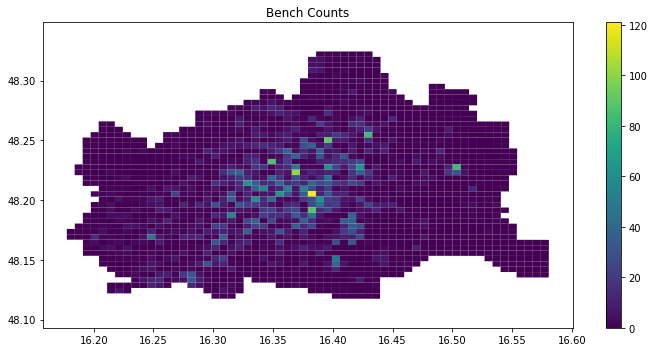

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
amenitydf.plot(column='bench_count', legend=True, ax=ax1)
ax1.set_title('Bench Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

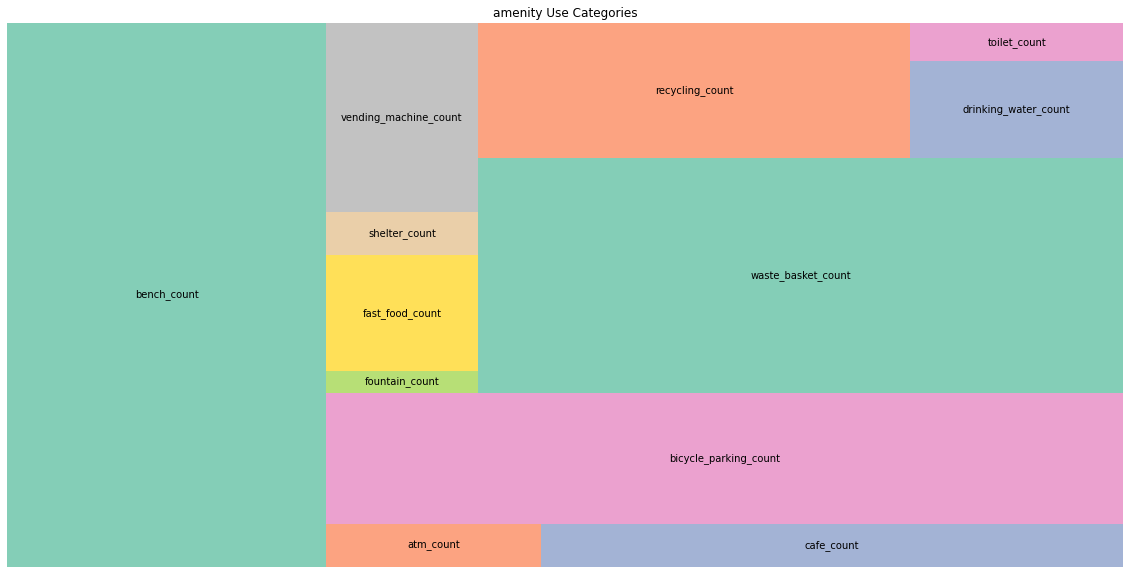

In [ ]:
#visualising amounts
plt.rcParams["figure.figsize"] = (20,10)
squarify.plot(sizes=amenityTotals['total'], label=amenityTotals['amenity'], alpha=.8, color=plt.cm.Set2.colors)
plt.axis('off')
plt.title("amenity Use Categories")
plt.show()

Saving the dataframe

In [ ]:
# only needed to do once
%%script echo 
filepath_csv = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenityTotals.csv'
amenityTotals.to_csv(filepath_csv,index=False,mode='w')

## LANDUSE

landuse count totals for each tile (1816 tiles + 11 landuse types combined to 6)

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/all_landuses_fixed.geojson", "r")
landusedf = gpd.read_file(json_file_grid)
landusedf.head(5)
#len(file_grid)

,RE,SE_SDO_ROWID,allotment_count,ID,greenhouse_count,cemetery_count,commercial_count,industrial_count,railway_count,residential_count,farmland_count,retail_count,park_count,forest_count,geometry
0,108,193,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,109,194,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,110,195,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,111,196,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,112,197,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


combine similar landuses into 6 groups

In [ ]:
sum_column = landusedf["allotment_count"] + landusedf["greenhouse_count"] + landusedf["cemetery_count"] + landusedf["forest_count"] + landusedf["park_count"] + landusedf["farmland_count"]
landusedf["nature_count"] = sum_column
landuseTotals = landusedf.drop(["ID", "RE","SE_SDO_ROWID"], axis=1, inplace=True)
landusedf = landusedf.drop(["allotment_count","greenhouse_count","cemetery_count","forest_count","park_count","farmland_count"], axis=1)
landusedf

,commercial_count,industrial_count,railway_count,residential_count,retail_count,geometry,nature_count
0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",20.0
1,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",22.0
2,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",14.0
3,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",1.0
4,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",0.0
...,...,...,...,...,...,...,...
1811,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",20.0
1812,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",5.0
1813,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",0.0
1814,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",0.0


rename nature column to be clearer

In [ ]:
landusedf.rename({'nature_count': 'landnature_count'}, axis=1, inplace=True)
landusedf.rename({'commercial_count': 'landcommercial_count'}, axis=1, inplace=True)

In [ ]:
landusedf.head(2)

,landcommercial_count,industrial_count,railway_count,residential_count,retail_count,geometry,landnature_count
0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",20.0
1,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",22.0


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/landuseCombined.geojson'
landusedf.to_file(filepath_tag_geojson, driver='GeoJSON')

save all combined landuse groups

calculating landuse totals

In [ ]:
# calculating landuse totals

landuseTotals= landusedf.sum(axis=0)
landuseTotals = landuseTotals.to_frame()
landuseTotals.columns = ['total']
landuseTotals
landuseTotals = landuseTotals.reset_index()
landuseTotals.rename(columns={'index':'landuse'}, inplace=True)
landuseTotals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,landuse,total
0,landcommercial_count,724.0
1,industrial_count,1807.0
2,railway_count,452.0
3,residential_count,8420.0
4,retail_count,272.0
5,landnature_count,18836.0


check with maps

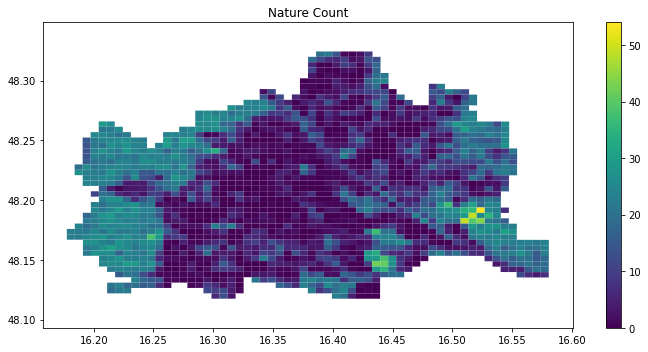

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

landusedf.plot(column='landnature_count', legend=True, ax=ax1)
ax1.set_title('Nature Count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

saving out landuse totals

In [ ]:
%%script echo 
filepath_csv = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/landuseTotals.csv'
landuseTotals.to_csv(filepath_csv,index=False,mode='w')

## LOOKING AT CITY FEATURES (INVESTIGATION ONLY)

Get location (pick smaller zone or whole city)

In [ ]:
#place_name="Vienna, 1010, Austria"
place_name="KG Innere Stadt, Innere Stadt, Vienna, 1010, Austria"
G = ox.graph_from_place(place_name,network_type='walk', simplify=True) #other network types: drive, bike, drive_service, all, all_private

Create graph

In [ ]:
#Retrieve nodes and edges from the graph
nodes, edges = ox.graph_to_gdfs(G)
nodes.shape, edges.shape
#Get boundary area by a place name
area = ox.geocode_to_gdf(place_name)

Selecting OSM features

In [ ]:
tags_amen = {
    'amenity':True,
    'leisure':True,
    'shop':True,
    'landuse':True,
    'natural':True,
    'water': True,
    'waterway': True,
    'building': True,
}

In [ ]:
%time OSM_locations = ox.geometries.geometries_from_place(place_name, tags=tags_amen)
OSM_locations.head(2)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


CPU times: user 2.87 s, sys: 82.6 ms, total: 2.95 s
Wall time: 2.96 s


highway                   geometry addr:city  \
element_type osmid                                                   
node         60438337     NaN  POINT (16.36826 48.20464)      Wien   
             60438614     NaN  POINT (16.37460 48.20696)      Wien   

                      addr:country addr:housenumber addr:postcode  \
element_type osmid                                                  
node         60438337           AT                1          1010   
             60438614           AT               15          1010   

                          addr:street      amenity changing_table  \
element_type osmid                                                  
node         60438337  Albertinaplatz  arts_centre            yes   
             60438614    Singerstraße     pharmacy            NaN   

                      changing_table:location  ... building:wikidata  \
element_type osmid                             ...                     
node         60438337       wheelchair_toilet  ...               NaN   
             60438614                     NaN  ...               NaN   

                      castle_type:it community:en community:fr  \
element_type osmid                                               
node         60438337            NaN          NaN          NaN   
             60438614            NaN          NaN          NaN   

                      community:gender community:it disused:amenity  \
element_type osmid                                                    
node         60438337              NaN          NaN             NaN   
             60438614              NaN          NaN             NaN   

                      description:de esperanto service_times  
element_type osmid                                            
node         60438337            NaN       NaN           NaN  
             60438614            NaN       NaN           NaN  

[2 rows x 488 columns]

In [ ]:
OSM_locations = OSM_locations.loc[['node']]
OSM_locations.dropna(subset=['geometry'],inplace=True)

In [ ]:
OSM_col_locations = OSM_locations.loc[['node'],['geometry', 'building', 'name','amenity','leisure','shop','landuse','natural','water','waterway','highway']]
OSM_col_locations = OSM_col_locations.reset_index(level=[0,1]) #deal with multiindex column names
#create "tag" for custom labeling
OSM_col_locations['tag'] = np.nan

In [ ]:
#Food
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bar','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='restaurant','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='pub','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='cafe','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='fast_food','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='food_court','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='marketplace','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='	biergarten','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='ice_cream','tag'] = 'food'

#Education
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='college','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='kindergarten','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='language_school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='library','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='music_school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='university','tag'] = 'education'

#Transportation
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bus_station','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='ferry_terminal','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='stop_position','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='bus_station','tag'] = 'transportation'


#Entertainment
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='arts_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='casino','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='cinema','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='nightclub','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='theatre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='social_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='gambling','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='events_venue','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='conference_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='community_centre','tag'] = 'entertainment'

#Residential
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='apartments','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='house','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='semidetached_house','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='condominium','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='terrace','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='detached','tag'] = 'residential'

#Commercial
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='atm','tag'] = 'commercial'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bank','tag'] = 'commercial'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bureau_de_change','tag'] = 'commercial'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='commercial','tag'] = 'commercial'

#Healthcare
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='clinic','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='dentist','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='doctors','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='hospital','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='pharmacy','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='social_facility','tag'] = 'healthcare'

#Highway
OSM_col_locations.loc[OSM_col_locations.loc[:,'highway']=='trunk','tag'] = 'highway'
OSM_col_locations.loc[OSM_col_locations.loc[:,'highway']=='primary','tag'] = 'highway'
OSM_col_locations.loc[OSM_col_locations.loc[:,'highway']=='secondary','tag'] = 'highway'
OSM_col_locations.loc[OSM_col_locations.loc[:,'highway']=='tertiary','tag'] = 'highway'

#Nature
OSM_col_locations.loc[OSM_col_locations.loc[:,'leisure']=='park','tag'] = 'nature'
OSM_col_locations.loc[OSM_col_locations.loc[:,'leisure']=='garden','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='allotments','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='flowerbed','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='forest','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='meadow','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='	greenfield','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='greenhouse_horticulture','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'natural']==OSM_col_locations.loc[:,'natural'],'tag'] = 'nature'

In [ ]:
#df_amen.pivot_table(index=['tag'], aggfunc='size')
OSM_col_locations.head(2)
OSM_col_locations.shape
OSM_col_locations.dropna(subset=['tag'],inplace=True)
OSM_col_locations_save = OSM_col_locations.loc[:,['osmid','tag','geometry']]
OSM_col_locations_save['longitude'] = OSM_col_locations_save['geometry'].x #get the point values from geometry object
OSM_col_locations_save['latitude'] = OSM_col_locations_save['geometry'].y
OSM_col_locations_save.head()

,osmid,tag,geometry,longitude,latitude
0,60438337,entertainment,POINT (16.36826 48.20464),16.368261,48.204636
1,60438614,healthcare,POINT (16.37460 48.20696),16.374604,48.206958
4,74809043,education,POINT (16.37086 48.20092),16.370855,48.200920
7,76514684,food,POINT (16.37368 48.20965),16.373684,48.209647
8,76515393,food,POINT (16.37072 48.21005),16.370718,48.210053


In [ ]:
df_amen= OSM_col_locations 

In [ ]:
crs = "EPSG:4326"
df_amen = df_amen.to_crs(crs)

# calculating x and y which will be used later to find nearest ttc stop to address 
df_amen['x'] = df_amen.geometry.x
df_amen['y'] = df_amen.geometry.y

In [ ]:
G=ox.project_graph(G,to_crs=crs)

In [ ]:
entertainment = df_amen.loc[df_amen['tag'] == 'entertainment']
nature = df_amen.loc[df_amen['tag'] == 'nature']
education = df_amen.loc[df_amen['tag'] == 'education']
financial = df_amen.loc[df_amen['tag'] == 'financial']
food = df_amen.loc[df_amen['tag'] == 'food']
healthcare = df_amen.loc[df_amen['tag'] == 'healthcare']
transportation = df_amen.loc[df_amen['tag'] == 'transportation']

In [ ]:
df_amen

,element_type,osmid,geometry,building,name,amenity,leisure,shop,landuse,natural,water,waterway,highway,tag,x,y
0,node,60438337,POINT (16.36826 48.20464),NaN,Albertina,arts_centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,entertainment,16.368261,48.204636
1,node,60438614,POINT (16.37460 48.20696),NaN,"Apotheke ""Zum goldenen Reichsapfel""",pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthcare,16.374604,48.206958
4,node,74809043,POINT (16.37086 48.20092),NaN,HAK I,school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education,16.370855,48.200920
7,node,76514684,POINT (16.37368 48.20965),NaN,Pizza Bizi,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food,16.373684,48.209647
8,node,76515393,POINT (16.37072 48.21005),NaN,Korb,cafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food,16.370718,48.210053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,node,9590452143,POINT (16.37711 48.20945),NaN,Truth and Dare,bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food,16.377112,48.209449
8217,node,9686943317,POINT (16.36913 48.21053),NaN,Benvenuti al Bar Campar,bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food,16.369129,48.210528
8221,node,9708703592,POINT (16.36426 48.21307),NaN,Health Consult,clinic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,healthcare,16.364260,48.213068
8225,node,9741298190,POINT (16.37053 48.20807),NaN,Zum Goldenen Würstel,fast_food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,food,16.370529,48.208070


filter so only points

In [ ]:
#plotting everything!
fig, ax = plt.subplots(figsize=(15,15))
edges.plot(ax=ax, linewidth=0.2, edgecolor='white')

entertainment.plot(ax=ax, color='blue', markersize=10, zorder=10)
nature.plot(ax=ax, color='green', markersize=10, zorder=10)
financial.plot(ax=ax, color='orange', markersize=10, zorder=10)
education.plot(ax=ax, color='red', markersize=10, zorder=10)
food.plot(ax=ax, color='pink', markersize=10, zorder=10)
healthcare.plot(ax=ax, color='yellow', markersize=10, zorder=10)

tags_b = {'building': 'yes'}
buildings = ox.geometries.geometries_from_place(place_name, tags_b)
buildings.plot(ax=ax, color='grey', zorder=5)
area.plot(ax=ax, facecolor='black', zorder=0)
 
plt.show()

In [ ]:
df_amen.pivot_table(index=['tag'], aggfunc='size')

tag
commercial        99
education         50
entertainment     56
food             677
healthcare        65
dtype: int64

## BUILDING TYPES

1 commercial	
2 transport	 
3 residential		
4 nature  
5 retail 
6 entertainment 
7 food
8 healthcare

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/buildingcountstotal.geojson", "r")
buildingdf = gpd.read_file(json_file_grid)
buildingdf = buildingdf.drop(["geometry","SE_SDO_ROWID"], axis=1)
buildingdf.head(5)

,entertainment_count,ID,commercial_count,education_count,food_count,healthcare_count,nature_count,residentialbuilding_count,transportation_count
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# adding up the columns
buildingdf = buildingdf.drop(["ID"], axis=1)
buildingdfSum= buildingdf.sum(axis=0)
buildingdfSum

entertainment_count           333.0
commercial_count              473.0
education_count              1175.0
food_count                   5320.0
healthcare_count             1604.0
nature_count                  779.0
residentialbuilding_count    9077.0
transportation_count         7363.0
dtype: float64

In [ ]:
# calculating building totals
buildingdfSum = buildingdfSum.to_frame()
buildingdfSum.columns = ['total']
buildingdfSum
buildingdfSum = buildingdfSum.reset_index()
buildingdfSum.rename(columns={'index':'building_type'}, inplace=True)
buildingdfSum

,building_type,total
0,entertainment_count,333.0
1,commercial_count,473.0
2,education_count,1175.0
3,food_count,5320.0
4,healthcare_count,1604.0
5,nature_count,779.0
6,residentialbuilding_count,9077.0
7,transportation_count,7363.0


In [ ]:
#Food
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bar','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='restaurant','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='pub','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='cafe','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='fast_food','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='food_court','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='marketplace','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='	biergarten','tag'] = 'food'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='ice_cream','tag'] = 'food'

#Education
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='college','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='kindergarten','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='language_school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='library','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='music_school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='school','tag'] = 'education'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='university','tag'] = 'education'

#Transportation
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bus_station','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='public_transport','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'public_transport']=='stop_position','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'public_transport']=='station','tag'] = 'transportation'
OSM_col_locations.loc[OSM_col_locations.loc[:,'public_transport']=='platform','tag'] = 'transportation'

#Entertainment
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='arts_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='casino','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='cinema','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='nightclub','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='theatre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='social_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='gambling','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='events_venue','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='conference_centre','tag'] = 'entertainment'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='community_centre','tag'] = 'entertainment'

#Residential
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='apartments','tag'] = 'residential'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='house','tag'] = 'residential'


#Commercial

OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bank','tag'] = 'commercial'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='bureau_de_change','tag'] = 'commercial'
OSM_col_locations.loc[OSM_col_locations.loc[:,'building']=='commercial','tag'] = 'commercial'

#Healthcare
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='clinic','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='dentist','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='doctors','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='hospital','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='pharmacy','tag'] = 'healthcare'
OSM_col_locations.loc[OSM_col_locations.loc[:,'amenity']=='social_facility','tag'] = 'healthcare'



#Nature
OSM_col_locations.loc[OSM_col_locations.loc[:,'leisure']=='park','tag'] = 'nature'
OSM_col_locations.loc[OSM_col_locations.loc[:,'leisure']=='garden','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='allotments','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='flowerbed','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='forest','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='meadow','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='	greenfield','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'landuse']=='greenhouse_horticulture','tag'] = 'nature'
#OSM_col_locations.loc[OSM_col_locations.loc[:,'natural']==OSM_col_locations.loc[:,'natural'],'tag'] = 'nature'

## DENSITY

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/popdensity_grided.geojson", "r")
popdensity = gpd.read_file(json_file_grid)


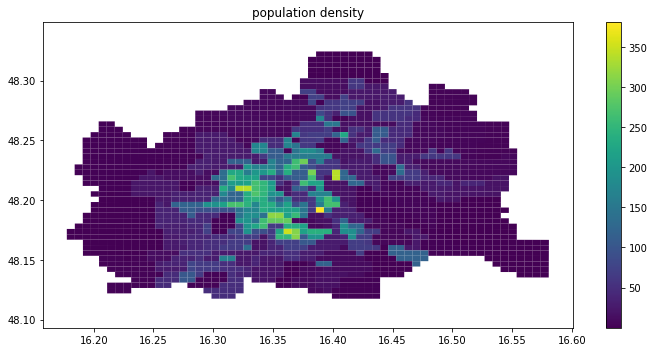

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

popdensity.plot(column='popden12', legend=True, ax=ax1)
ax1.set_title('population density')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
popdensity = popdensity.drop(["geometry","SE_SDO_ROWID"], axis=1)
popdensity.head(5)

In [ ]:
popdensity.shape[0]

1816

## COMBINE LANDUSE AND BUILDNG TYPES AND DENSITY

In [ ]:
landusedf.head(2)

,landcommercial_count,industrial_count,railway_count,residential_count,retail_count,geometry,landnature_count
0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",20.0
1,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",22.0


In [ ]:
buildingdf.head(2)

,entertainment_count,ID,commercial_count,education_count,food_count,healthcare_count,nature_count,residentialbuilding_count,transportation_count
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
popdensity.head(2)

,popden12
0,1.45232
1,1.45232


In [ ]:
# combine landuse and population density
completedf = pd.concat([landusedf, popdensity, buildingdf], axis=1)

In [ ]:
completedf.head(2)

,landcommercial_count,industrial_count,railway_count,residential_count,retail_count,geometry,landnature_count,popden12,entertainment_count,ID,commercial_count,education_count,food_count,healthcare_count,nature_count,residentialbuilding_count,transportation_count
0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",20.0,1.45232,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",22.0,1.45232,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


merging similar columns in single category....clean up!

In [ ]:
resisum_column = completedf["residential_count"] + completedf["residentialbuilding_count"]
completedf["resi_count"] = resisum_column

transsum_column = completedf["transportation_count"] + completedf["railway_count"]
completedf["transport_count"] = transsum_column

naturessum_column = completedf["landnature_count"] + completedf["nature_count"]
completedf["green_count"] = naturessum_column

commercialsum_column = completedf["landcommercial_count"] + completedf["commercial_count"]
completedf["commercials_count"] = commercialsum_column

completedf = completedf.drop(["residential_count","residentialbuilding_count","transportation_count","railway_count","landnature_count","nature_count","landcommercial_count","commercial_count"], axis=1)
completedf

,industrial_count,retail_count,geometry,popden12,entertainment_count,ID,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count
0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",1.45232,0.0,1,0.0,0.0,0.0,0.0,0.0,20.0,0.0
1,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",1.45232,0.0,2,0.0,0.0,0.0,0.0,0.0,22.0,0.0
2,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",1.45232,0.0,3,0.0,0.0,0.0,0.0,0.0,14.0,0.0
3,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",1.45232,0.0,4,0.0,0.0,0.0,0.0,2.0,1.0,0.0
4,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",1.45232,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,0.0,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",2.21648,0.0,1812,0.0,0.0,0.0,0.0,0.0,20.0,0.0
1812,0.0,0.0,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",2.21648,0.0,1813,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1813,0.0,0.0,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",2.21648,0.0,1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1814,0.0,0.0,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",2.21648,0.0,1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0


saved out the complete tiled dataframe

In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/allTilesCount.geojson'
completedf.to_file(filepath_tag_geojson, driver='GeoJSON')

creating the zone totals

In [ ]:
# adding up the columns
zoneTotals= completedf.sum(axis=0)
zoneTotals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


industrial_count       1.807000e+03
retail_count           2.720000e+02
popden12               6.914389e+04
entertainment_count    3.330000e+02
ID                     1.649836e+06
education_count        1.175000e+03
food_count             5.320000e+03
healthcare_count       1.604000e+03
resi_count             1.749700e+04
transport_count        7.815000e+03
green_count            1.961500e+04
commercials_count      1.197000e+03
dtype: float64

In [ ]:
# creating amenity total dataframe
zoneTotals = zoneTotals.drop(["ID","popden12"], axis=0)
zoneTotals = zoneTotals.to_frame()
zoneTotals.columns = ['total']
zoneTotals = zoneTotals.reset_index()
zoneTotals.rename(columns={'index':'zone'}, inplace=True)
type(zoneTotals)
zoneTotals

,zone,total
0,industrial_count,1807.0
1,retail_count,272.0
2,entertainment_count,333.0
3,education_count,1175.0
4,food_count,5320.0
5,healthcare_count,1604.0
6,resi_count,17497.0
7,transport_count,7815.0
8,green_count,19615.0
9,commercials_count,1197.0


In [ ]:
# only needed to do once
%%script echo 
filepath_csv = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/zoneTotals.csv'
zoneTotals.to_csv(filepath_csv,index=False,mode='w')

# 02 CLUSTERING

## LANDUSE + BUILDING TYPE + DENISTY CLUSTERING

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/allTilesCount.geojson", "r")
allTilesCount = gpd.read_file(json_file_grid)
allTilesCount.head(2)

,industrial_count,retail_count,popden12,entertainment_count,ID,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count,geometry
0,0.0,0.0,1.45232,0.0,1,0.0,0.0,0.0,0.0,0.0,20.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,0.0,1.45232,0.0,2,0.0,0.0,0.0,0.0,0.0,22.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."


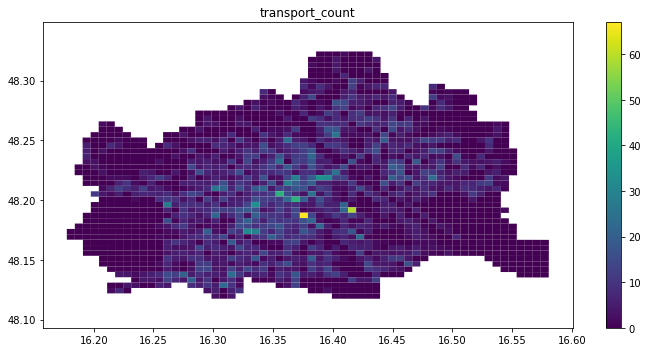

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

allTilesCount.plot(column='transport_count', legend=True, ax=ax1)
ax1.set_title('transport_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

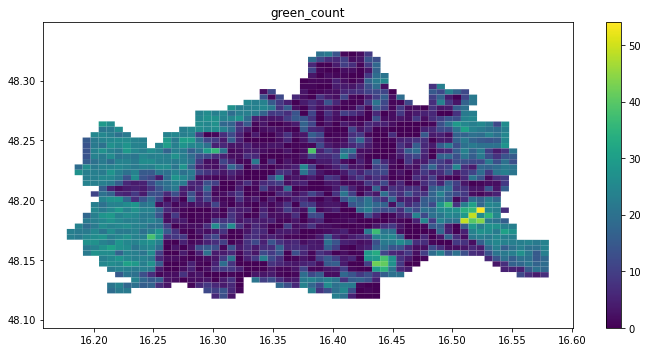

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

allTilesCount.plot(column='green_count', legend=True, ax=ax1)
ax1.set_title('green_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
cluster_data = allTilesCount[['industrial_count', 'retail_count', 'entertainment_count','education_count', 'food_count', 'healthcare_count', 'resi_count','transport_count','green_count','commercials_count','popden12',]]
cluster_data.head()

,industrial_count,retail_count,entertainment_count,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count,popden12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,1.45232
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1.45232
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.45232
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.45232
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.45232


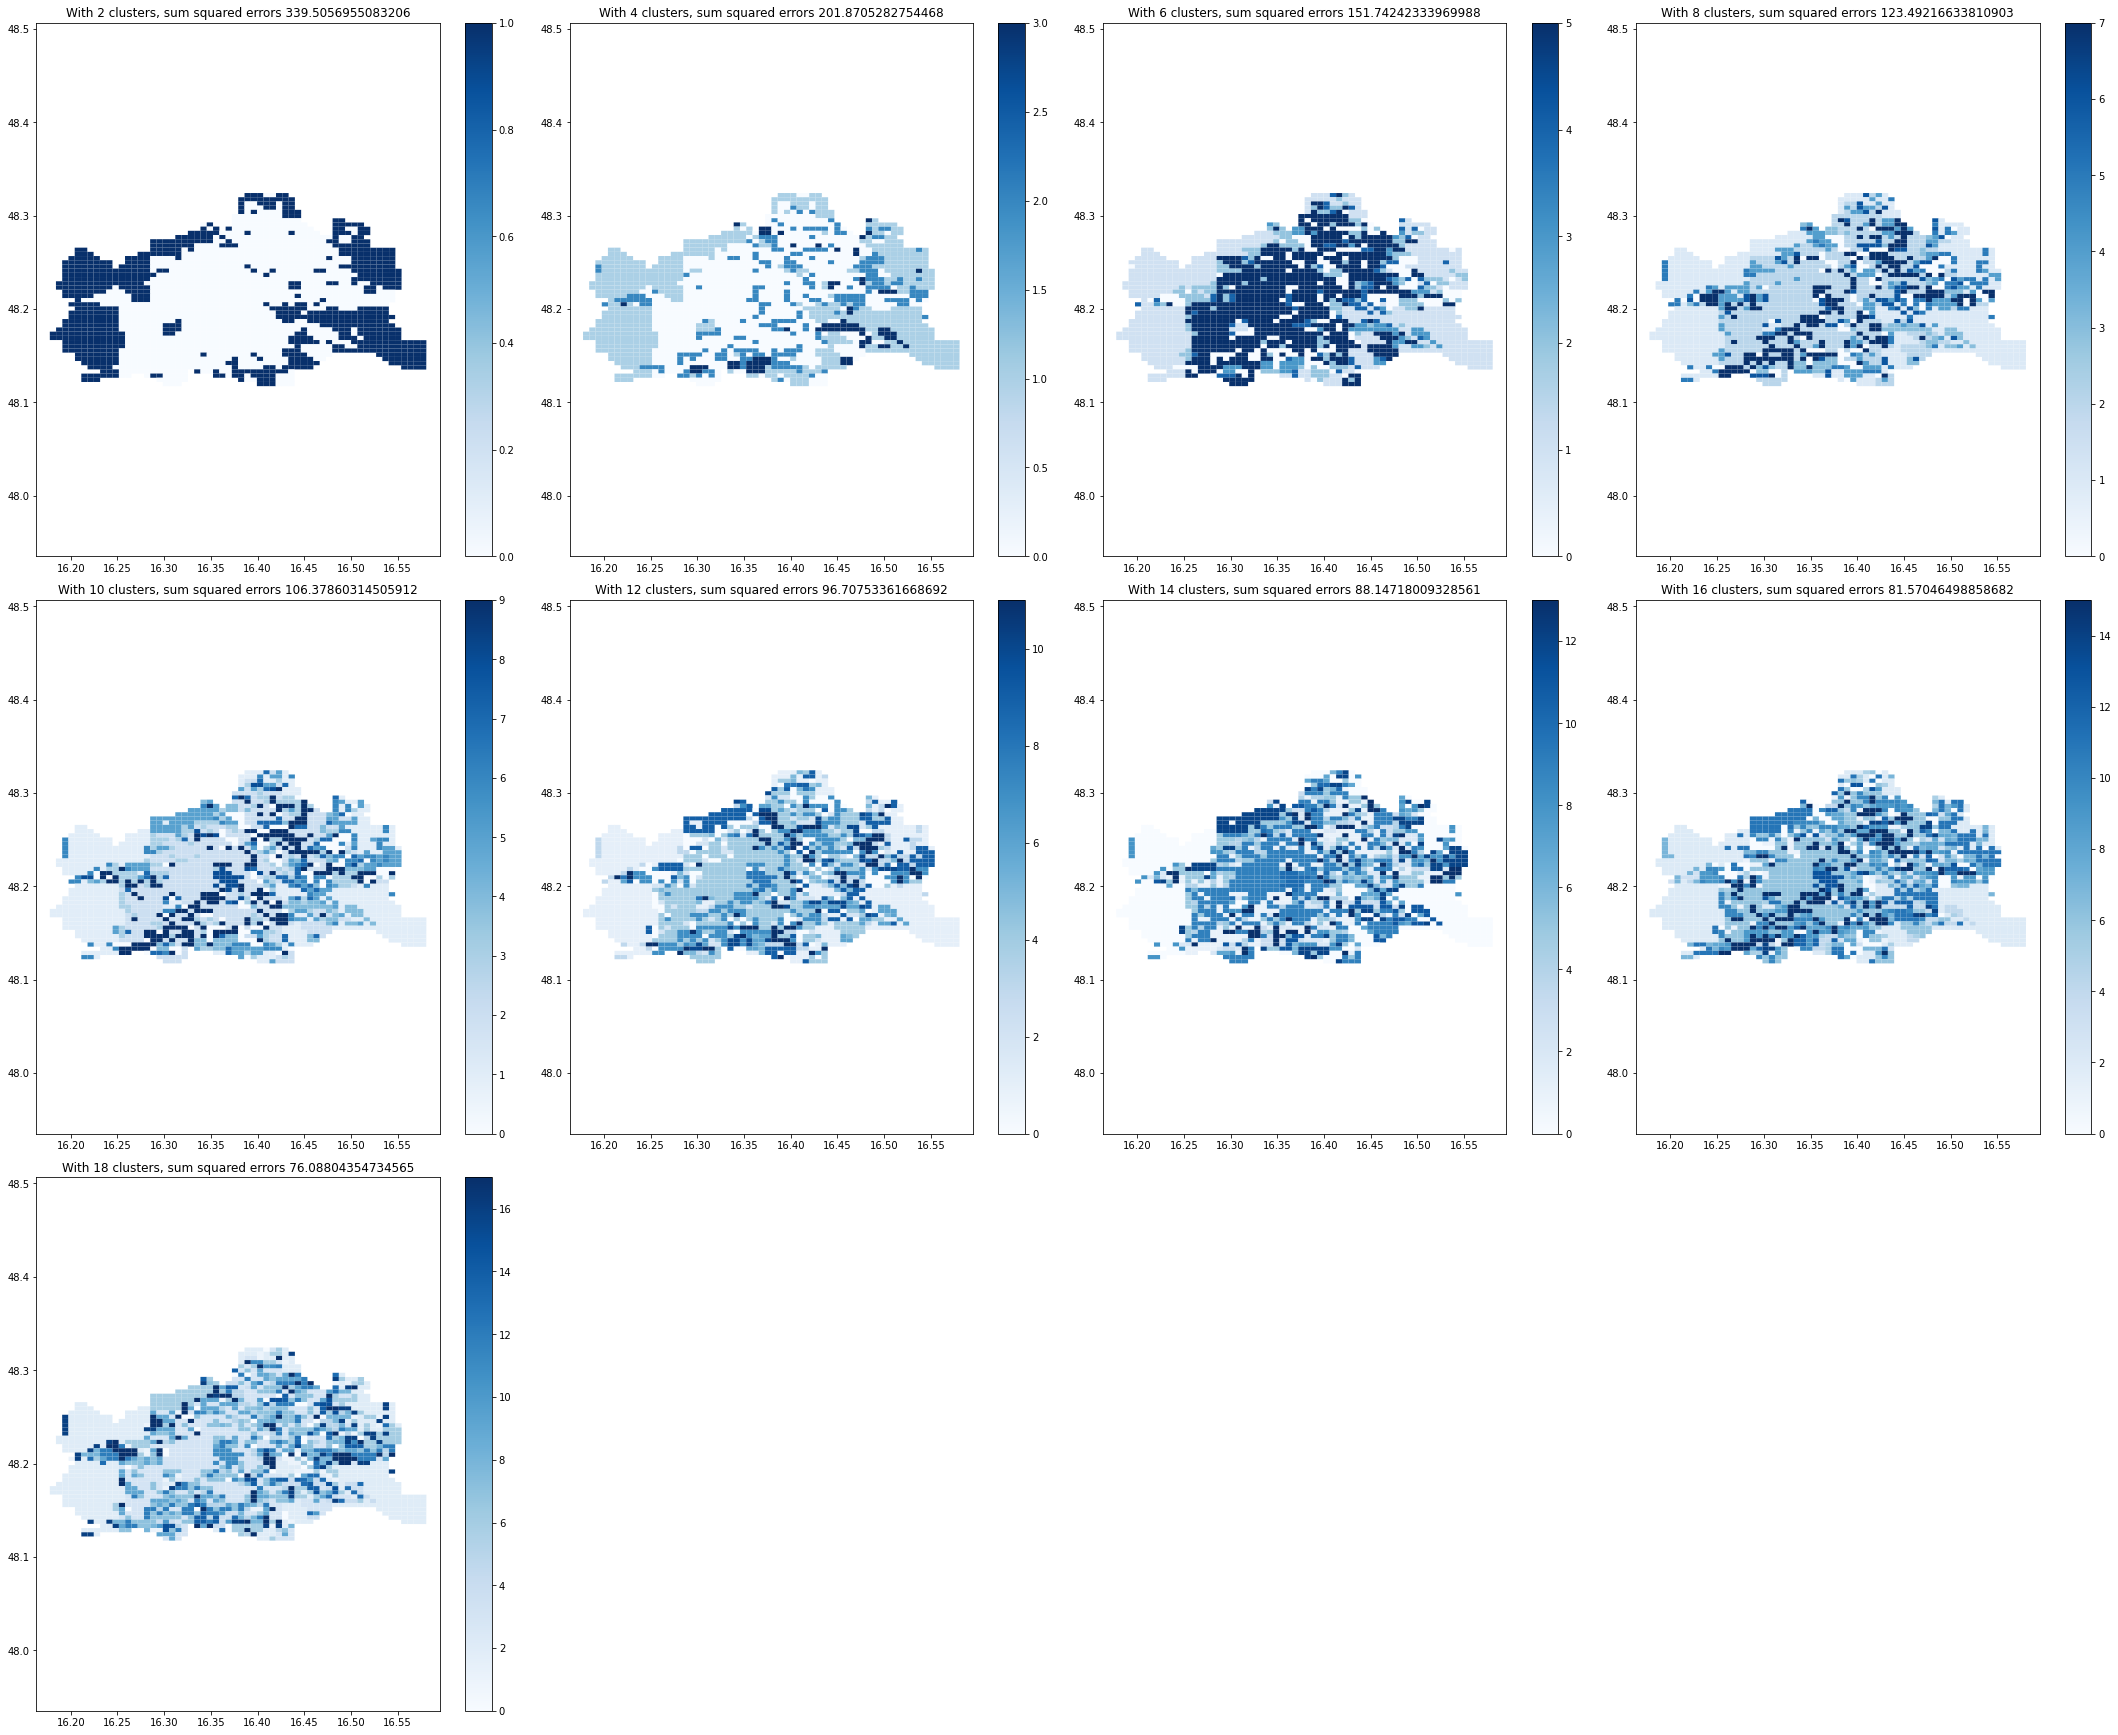

In [ ]:
plt.figure(figsize=(30,40))

ind = 0

# create dict to store scores
clusters = {
    'clusters': [],
    'score':[]
}

# normalize the data before running the model
norm_cluster_data = preprocessing.normalize(cluster_data)

for i in np.arange(2,20, 2):

    ax = plt.subplot(5,4, ind+1)
    
    ind+=1

    # run kmeans model
    
    km = KMeans(random_state=234,n_clusters=i).fit(norm_cluster_data)
    res=km.predict(norm_cluster_data)
    
    allTilesCount['cluster_cat'] = res

    # create title with number of clusters and MSE ( mean squared error )
    title = f'With {i} clusters, sum squared errors {km.inertia_}'
    # plot the viz
    allTilesCount.plot(column='cluster_cat', legend=True, figsize=(10,10), ax=ax, cmap='Blues')
    # set title
    ax.set_title(title)
    # aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    clusters['clusters'].append(i)
    clusters['score'].append(km.inertia_)

plt.tight_layout()
plt.show()

In [ ]:
# We can also create a function to graph and handle labels for us

def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(x, y)

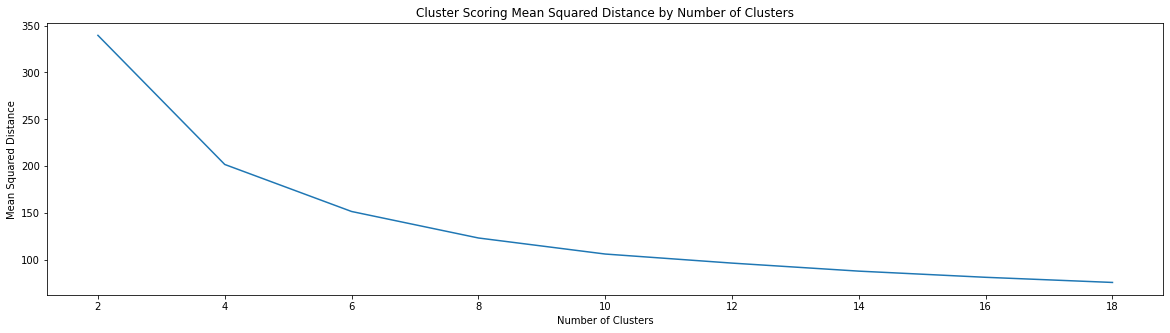

In [ ]:
cluster_scores = pd.DataFrame.from_dict(clusters, orient='index').transpose()
fig, ax = plt.subplots(figsize=(20,5))
plot(cluster_scores.clusters, cluster_scores.score, ax, 'Cluster Scoring Mean Squared Distance by Number of Clusters','Number of Clusters', 'Mean Squared Distance')

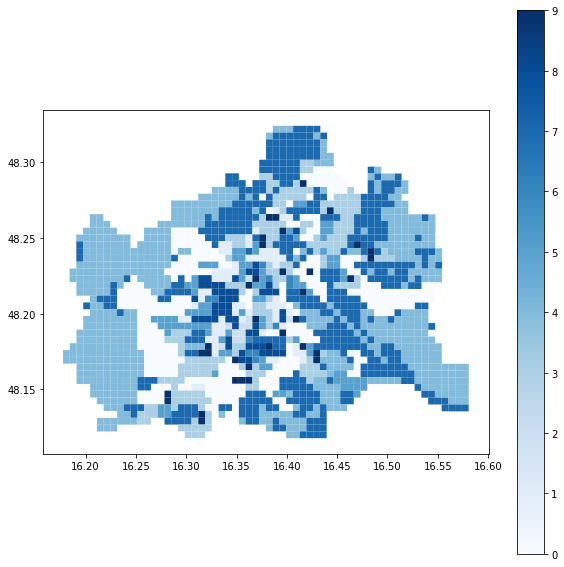

In [ ]:
optimal_number_clusters = 10

km = KMeans(random_state=234,n_clusters=optimal_number_clusters).fit(cluster_data)
res=km.predict(cluster_data)
allTilesCount['cluster_cat'] = res
allTilesCount.plot(column='cluster_cat', legend=True, cmap='Blues', figsize=(10,10));

In [ ]:
clusterGrid = allTilesCount
clusterGrid =clusterGrid[['geometry','cluster_cat']]
clusterGrid

,geometry,cluster_cat
0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",4
1,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",4
2,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",4
3,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",7
4,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",7
...,...,...
1811,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",4
1812,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",7
1813,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",7
1814,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",7


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/clusterGrid.geojson'
clusterGrid.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
allTilesCount


,industrial_count,retail_count,popden12,entertainment_count,ID,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count,geometry,cluster_cat
0,0.0,0.0,1.45232,0.0,1,0.0,0.0,0.0,0.0,0.0,20.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",4
1,0.0,0.0,1.45232,0.0,2,0.0,0.0,0.0,0.0,0.0,22.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",4
2,0.0,0.0,1.45232,0.0,3,0.0,0.0,0.0,0.0,0.0,14.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",4
3,0.0,0.0,1.45232,0.0,4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",7
4,0.0,0.0,1.45232,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,0.0,2.21648,0.0,1812,0.0,0.0,0.0,0.0,0.0,20.0,0.0,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",4
1812,0.0,0.0,2.21648,0.0,1813,0.0,0.0,0.0,0.0,0.0,5.0,0.0,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",7
1813,0.0,0.0,2.21648,0.0,1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",7
1814,0.0,0.0,2.21648,0.0,1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",7


aggregating all tiles into cluster

In [ ]:
aggregation_functions = {'industrial_count': 'sum', 'retail_count': 'sum', 'entertainment_count': 'sum', 'education_count': 'sum', 'food_count': 'sum', 'healthcare_count': 'sum', 'resi_count': 'sum', 'transport_count': 'sum', 'green_count': 'sum', 'commercials_count': 'sum'}
landusecluster = allTilesCount.groupby(allTilesCount['cluster_cat']).aggregate(aggregation_functions)
#type(amenitycluster)
landusecluster

,industrial_count,retail_count,entertainment_count,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count
cluster_cat,,,,,,,,,,
0,245.0,42.0,38.0,156.0,455.0,161.0,3044.0,1779.0,2133.0,263.0
1,25.0,21.0,58.0,152.0,1009.0,375.0,1380.0,802.0,234.0,135.0
2,1.0,2.0,14.0,62.0,251.0,64.0,1819.0,99.0,52.0,20.0
3,238.0,96.0,55.0,258.0,829.0,245.0,2745.0,1381.0,994.0,204.0
4,58.0,0.0,0.0,11.0,22.0,8.0,463.0,398.0,13205.0,1.0
5,66.0,27.0,47.0,171.0,848.0,303.0,1945.0,813.0,336.0,134.0
6,2.0,0.0,8.0,19.0,141.0,44.0,292.0,122.0,35.0,9.0
7,1145.0,67.0,18.0,92.0,336.0,88.0,1655.0,1615.0,2336.0,255.0
8,9.0,11.0,84.0,159.0,1205.0,256.0,1373.0,536.0,141.0,118.0


normalizing the counts to compare in bar charts

In [ ]:

# copy the data
landusecluster_min_max_scaled = landusecluster.copy()
  
# apply normalization techniques by Column 1
for column in ['industrial_count', 'retail_count', 'entertainment_count', 'education_count', 'food_count', 'healthcare_count', 'resi_count', 'transport_count', 'green_count', 'commercials_count']:
  landusecluster_min_max_scaled[column] = (landusecluster_min_max_scaled[column] - landusecluster_min_max_scaled[column].min()) / (landusecluster_min_max_scaled[column].max() - landusecluster_min_max_scaled[column].min())    
  
# view normalized data
display(landusecluster_min_max_scaled)

,industrial_count,retail_count,entertainment_count,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count
cluster_cat,,,,,,,,,,
0,0.213287,0.437500,0.452381,0.587045,0.366019,0.416894,1.000000,1.000000,0.159301,1.000000
1,0.020979,0.218750,0.690476,0.570850,0.834320,1.000000,0.395349,0.418452,0.015110,0.511450
2,0.000000,0.020833,0.166667,0.206478,0.193576,0.152589,0.554869,0.000000,0.001291,0.072519
3,0.207168,1.000000,0.654762,1.000000,0.682164,0.645777,0.891352,0.763095,0.072817,0.774809
4,0.049825,0.000000,0.000000,0.000000,0.000000,0.000000,0.062137,0.177976,1.000000,0.000000
5,0.056818,0.281250,0.559524,0.647773,0.698225,0.803815,0.600654,0.425000,0.022855,0.507634
6,0.000874,0.000000,0.095238,0.032389,0.100592,0.098093,0.000000,0.013690,0.000000,0.030534
7,1.000000,0.697917,0.214286,0.327935,0.265427,0.217984,0.495276,0.902381,0.174715,0.969466
8,0.006993,0.114583,1.000000,0.599190,1.000000,0.675749,0.392805,0.260119,0.008049,0.446565


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/landusecluster_min_max_scaled.csv'
landusecluster_min_max_scaled.to_csv(filepath_tag_geojson)

In [ ]:
landusecluster_min_max_scaled = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/landusecluster_min_max_scaled.csv')

In [ ]:
landusecluster_min_max_scaled = landusecluster_min_max_scaled.drop(["cluster_cat"], axis=1)

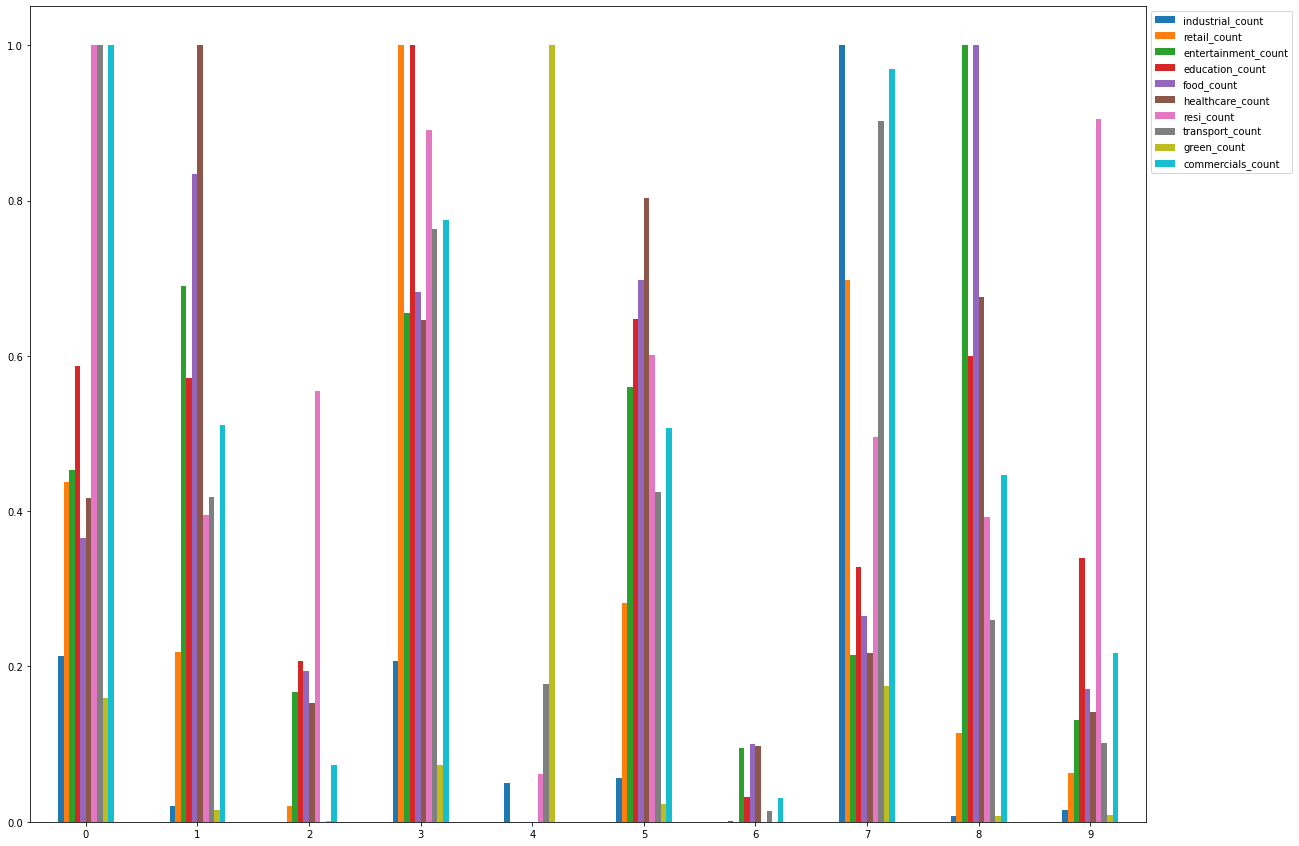

In [ ]:
ax = landusecluster_min_max_scaled.plot.bar(rot=0 ,figsize=(20,15))
ax.legend(bbox_to_anchor=(1.0, 1.0))

pie chart analysis for each cluster

In [ ]:
landusecluster_min_max_scaled

,industrial_count,retail_count,entertainment_count,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count
0,0.213287,0.437500,0.452381,0.587045,0.366019,0.416894,1.000000,1.000000,0.159301,1.000000
1,0.020979,0.218750,0.690476,0.570850,0.834320,1.000000,0.395349,0.418452,0.015110,0.511450
2,0.000000,0.020833,0.166667,0.206478,0.193576,0.152589,0.554869,0.000000,0.001291,0.072519
3,0.207168,1.000000,0.654762,1.000000,0.682164,0.645777,0.891352,0.763095,0.072817,0.774809
4,0.049825,0.000000,0.000000,0.000000,0.000000,0.000000,0.062137,0.177976,1.000000,0.000000
5,0.056818,0.281250,0.559524,0.647773,0.698225,0.803815,0.600654,0.425000,0.022855,0.507634
6,0.000874,0.000000,0.095238,0.032389,0.100592,0.098093,0.000000,0.013690,0.000000,0.030534
7,1.000000,0.697917,0.214286,0.327935,0.265427,0.217984,0.495276,0.902381,0.174715,0.969466
8,0.006993,0.114583,1.000000,0.599190,1.000000,0.675749,0.392805,0.260119,0.008049,0.446565
9,0.014860,0.062500,0.130952,0.340081,0.170752,0.141689,0.904433,0.101786,0.008656,0.217557


In [ ]:
clusterlanduse

,industrial_count,retail_count,entertainment_count,education_count,food_count,healthcare_count,resi_count,transport_count,green_count,commercials_count
0,0.213287,0.437500,0.452381,0.587045,0.366019,0.416894,1.000000,1.000000,0.159301,1.000000
1,0.020979,0.218750,0.690476,0.570850,0.834320,1.000000,0.395349,0.418452,0.015110,0.511450
2,0.000000,0.020833,0.166667,0.206478,0.193576,0.152589,0.554869,0.000000,0.001291,0.072519
3,0.207168,1.000000,0.654762,1.000000,0.682164,0.645777,0.891352,0.763095,0.072817,0.774809
4,0.049825,0.000000,0.000000,0.000000,0.000000,0.000000,0.062137,0.177976,1.000000,0.000000
5,0.056818,0.281250,0.559524,0.647773,0.698225,0.803815,0.600654,0.425000,0.022855,0.507634
6,0.000874,0.000000,0.095238,0.032389,0.100592,0.098093,0.000000,0.013690,0.000000,0.030534
7,1.000000,0.697917,0.214286,0.327935,0.265427,0.217984,0.495276,0.902381,0.174715,0.969466
8,0.006993,0.114583,1.000000,0.599190,1.000000,0.675749,0.392805,0.260119,0.008049,0.446565
9,0.014860,0.062500,0.130952,0.340081,0.170752,0.141689,0.904433,0.101786,0.008656,0.217557


In [ ]:
cluster6landuse = landusecluster_min_max_scaled.iloc[[6]]

In [ ]:
cluster6landuse= cluster6landuse.transpose()

In [ ]:
cluster6landuse = cluster6landuse.rename({0: 'values'}, axis=1)  # new method

In [ ]:
cluster6landuse = cluster6landuse.round(5)
cluster6landuse

,6
industrial_count,0.00087
retail_count,0.00000
entertainment_count,0.09524
education_count,0.03239
food_count,0.10059
healthcare_count,0.09809
resi_count,0.00000
transport_count,0.01369
green_count,0.00000
commercials_count,0.03053


In [ ]:
cluster6landuse[6]

industrial_count       0.00087
retail_count           0.00000
entertainment_count    0.09524
education_count        0.03239
food_count             0.10059
healthcare_count       0.09809
resi_count             0.00000
transport_count        0.01369
green_count            0.00000
commercials_count      0.03053
Name: 6, dtype: float64

In [ ]:
# apply normalization techniques by Column 1
cluster6landuse[6] = (cluster6landuse[6] - cluster6landuse[6].min()) / (cluster6landuse[6].max() - cluster6landuse[6].min())    
cluster6landuse = cluster6landuse[6]

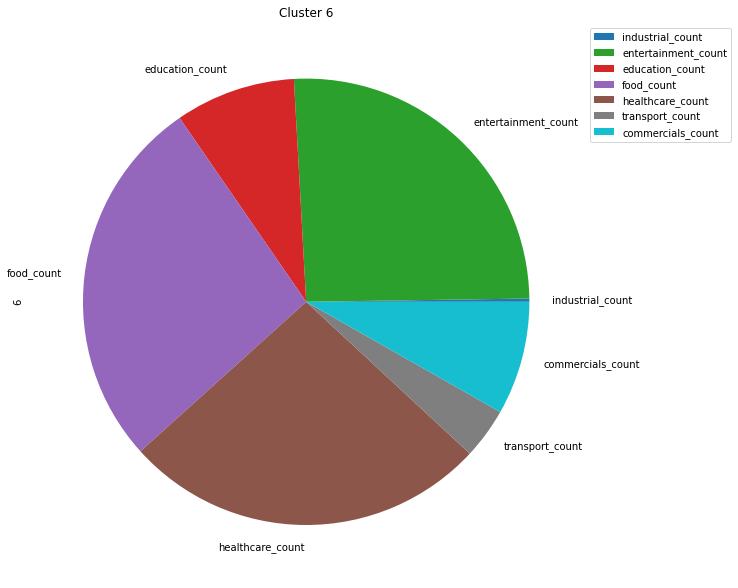

In [ ]:
plot = cluster6landuse.plot.pie(y=6, figsize=(10, 20))
plt.title("Cluster 6")
plot.legend(bbox_to_anchor=(1.0, 1.0))

2


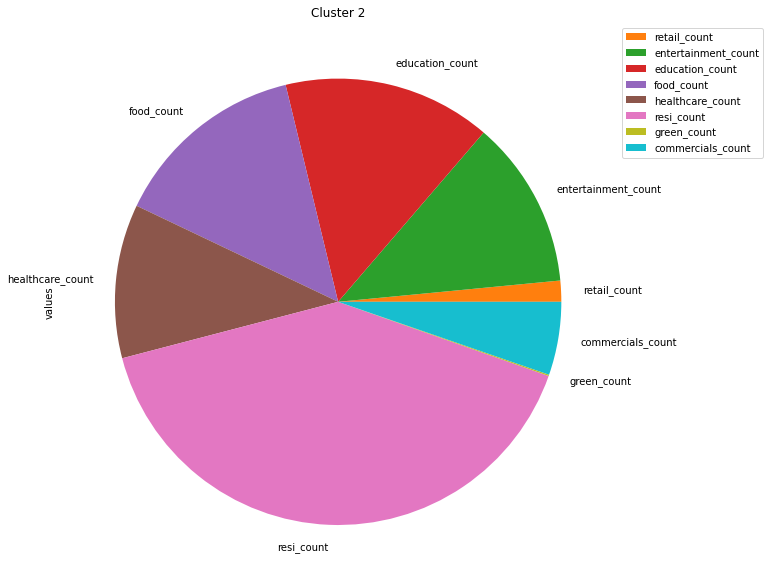

In [ ]:
var = "cluster"
clustNo = 2
dict1 = {var: clustNo}
print(dict1["cluster"])


dict1["cluster"] = landusecluster_min_max_scaled.iloc[[clustNo]]
dict1["cluster"]= dict1["cluster"].transpose()

dict1["cluster"] = dict1["cluster"].rename({clustNo: 'values'}, axis=1)
dict1["cluster"]
plot = dict1["cluster"].plot.pie(y='values', figsize=(10, 20))
plt.title("Cluster " + str(clustNo))
plot.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
dict1["cluster"]

,values
industrial_count,0.000000
retail_count,0.020833
entertainment_count,0.166667
education_count,0.206478
food_count,0.193576
healthcare_count,0.152589
resi_count,0.554869
transport_count,0.000000
green_count,0.001291
commercials_count,0.072519


## ANALYSIS

Combining total amenities for each zone

In [ ]:
amenitydf.head(10)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
5,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41978 48.32428, 16.41977 48.31979..."
6,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.42652 48.32428, 16.42651 48.31978..."
7,5.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"POLYGON ((16.37932 48.31981, 16.37932 48.31531..."
8,5.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"POLYGON ((16.38606 48.31981, 16.38606 48.31531..."
9,1.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39280 48.31980, 16.39280 48.31531..."


first add total number of tiles for each cluster

In [ ]:
# add tile counts
amenitydf['tile_count']='1'
# convert string to an integer
amenitydf['tile_count'] = amenitydf['tile_count'].astype(int)
#amenityclusterTotals = allTilesCount.drop(["ID"], axis=1)

In [ ]:
amenitydf.shape[0]

1816

add the cluster category to each of the tile amenities and total number of amenities per cluster

In [ ]:
allTilesCount =  allTilesCount['cluster_cat']

In [ ]:
allTilesCount= pd.concat([amenitydf, allTilesCount], axis=1)



In [ ]:
aggregation_functions = {'bench_count': 'sum', 'atm_count': 'sum', 'cafe_count': 'sum', 'bicycle_parking_count': 'sum', 'fountain_count': 'sum', 'fast_food_count': 'sum', 'shelter_count': 'sum', 'vending_machine_count': 'sum', 'waste_basket_count': 'sum', 'recycling_count': 'sum', 'drinking_water_count': 'sum', 'toilet_count': 'sum', 'tile_count': 'sum'}
amenitycluster = allTilesCount.groupby(allTilesCount['cluster_cat']).aggregate(aggregation_functions)
#type(amenitycluster)
amenitycluster

,bench_count,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count
cluster_cat,,,,,,,,,,,,,
0,1293.0,59.0,100.0,527.0,16.0,60.0,35.0,231.0,1199.0,590.0,167.0,77.0,317
1,1107.0,86.0,221.0,814.0,13.0,158.0,35.0,226.0,1057.0,278.0,117.0,33.0,65
2,177.0,19.0,48.0,189.0,8.0,33.0,13.0,38.0,135.0,46.0,26.0,8.0,11
3,1150.0,75.0,161.0,752.0,33.0,123.0,51.0,204.0,1113.0,467.0,123.0,55.0,198
4,819.0,3.0,4.0,60.0,13.0,6.0,10.0,26.0,272.0,80.0,74.0,38.0,582
5,717.0,67.0,180.0,616.0,18.0,137.0,50.0,187.0,958.0,346.0,90.0,35.0,95
6,75.0,12.0,30.0,133.0,2.0,30.0,5.0,33.0,97.0,51.0,19.0,5.0,11
7,1046.0,24.0,48.0,341.0,21.0,56.0,18.0,146.0,859.0,370.0,160.0,64.0,449
8,962.0,53.0,272.0,1087.0,19.0,162.0,69.0,150.0,814.0,272.0,117.0,41.0,53


In [ ]:
%%script echo
filepath_csv = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenitycluster.csv'
amenitycluster.to_csv(filepath_csv,index=False,mode='w')

calculate average amenities for each tile

In [ ]:
avg =[]
splitNo = len(amenitycluster)
for j in range(len(amenitycluster)):
  for i in range(amenitycluster.shape[1]-1):
    x = amenitycluster.loc[j,'tile_count']
    y = amenitycluster.iloc[j,i]
    z = y/x
    avg.append(z)

splits = np.array_split(avg, splitNo)
splits

[array([4.07886435, 0.18611987, 0.31545741, 1.66246057, 0.05047319,
        0.18927445, 0.11041009, 0.72870662, 3.78233438, 1.86119874,
        0.52681388, 0.24290221]),
 array([17.03076923,  1.32307692,  3.4       , 12.52307692,  0.2       ,
         2.43076923,  0.53846154,  3.47692308, 16.26153846,  4.27692308,
         1.8       ,  0.50769231]),
 array([16.09090909,  1.72727273,  4.36363636, 17.18181818,  0.72727273,
         3.        ,  1.18181818,  3.45454545, 12.27272727,  4.18181818,
         2.36363636,  0.72727273]),
 array([5.80808081, 0.37878788, 0.81313131, 3.7979798 , 0.16666667,
        0.62121212, 0.25757576, 1.03030303, 5.62121212, 2.35858586,
        0.62121212, 0.27777778]),
 array([1.40721649, 0.00515464, 0.00687285, 0.10309278, 0.02233677,
        0.01030928, 0.01718213, 0.04467354, 0.46735395, 0.13745704,
        0.12714777, 0.0652921 ]),
 array([ 7.54736842,  0.70526316,  1.89473684,  6.48421053,  0.18947368,
         1.44210526,  0.52631579,  1.96842105, 10.084

In [ ]:
avgTile = pd.DataFrame(splits, columns =['bench_count', 'atm_count', 'cafe_count', 'bicycle_parking_count', 'fountain_count', 'fast_food_count', 'shelter_count', 'vending_machine_count', 'waste_basket_count', 'recycling_count', 'drinking_water_count', 'toilet_count', ])
avgTile = avgTile.rename_axis('cluster').reset_index()
avgTile = avgTile.round(decimals=0)
amenitycluster['tile_count']

cluster_cat
0    317
1     65
2     11
3    198
4    582
5     95
6     11
7    449
8     53
9     35
Name: tile_count, dtype: int64

In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/avgAmenityTileCluster.csv'
avgTile.to_csv(filepath_tag_geojson)

In [ ]:
avgTile = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/avgAmenityTileCluster.csv')

In [ ]:
avgTile = avgTile.drop(["Unnamed: 0"], axis=1)
avgTile

,cluster,bench_count,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count
0,0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,0.0
1,1,17.0,1.0,3.0,13.0,0.0,2.0,1.0,3.0,16.0,4.0,2.0,1.0
2,2,16.0,2.0,4.0,17.0,1.0,3.0,1.0,3.0,12.0,4.0,2.0,1.0
3,3,6.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,6.0,2.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,8.0,1.0,2.0,6.0,0.0,1.0,1.0,2.0,10.0,4.0,1.0,0.0
6,6,7.0,1.0,3.0,12.0,0.0,3.0,0.0,3.0,9.0,5.0,2.0,0.0
7,7,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
8,8,18.0,1.0,5.0,21.0,0.0,3.0,1.0,3.0,15.0,5.0,2.0,1.0
9,9,13.0,0.0,1.0,6.0,0.0,1.0,0.0,1.0,9.0,3.0,1.0,0.0


In [ ]:
allTilesCount

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,geometry,tile_count,cluster_cat
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",1,4
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",1,4
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",1,4
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",1,7
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",1,4
1812,0.0,1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",1,7
1813,1.0,1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",1,7
1814,0.0,1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",1,7


In [ ]:
#%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/allTilesCountAmenities.geojson'
allTilesCount.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/allTilesCountAmenities.geojson', "r")
allTilesCountAmenities = gpd.read_file(json_file_grid)
allTilesCountAmenities.head(5)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count,cluster_cat,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


Random cluster analysis + bar charts to see number of amenities in each cluster (what do they really represent??)

In [ ]:
len(avgTile)

10

In [ ]:
avgTile.loc[avgTile['cluster'] == 0]
avgTile.loc[avgTile['cluster'] == 1]

,cluster,bench_count,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count
1,1,17.0,1.0,3.0,13.0,0.0,2.0,1.0,3.0,16.0,4.0,2.0,1.0


In [ ]:
bench_count = avgTile["bench_count"]
cluster = avgTile["cluster"]

In [ ]:
cluster = cluster.tolist()

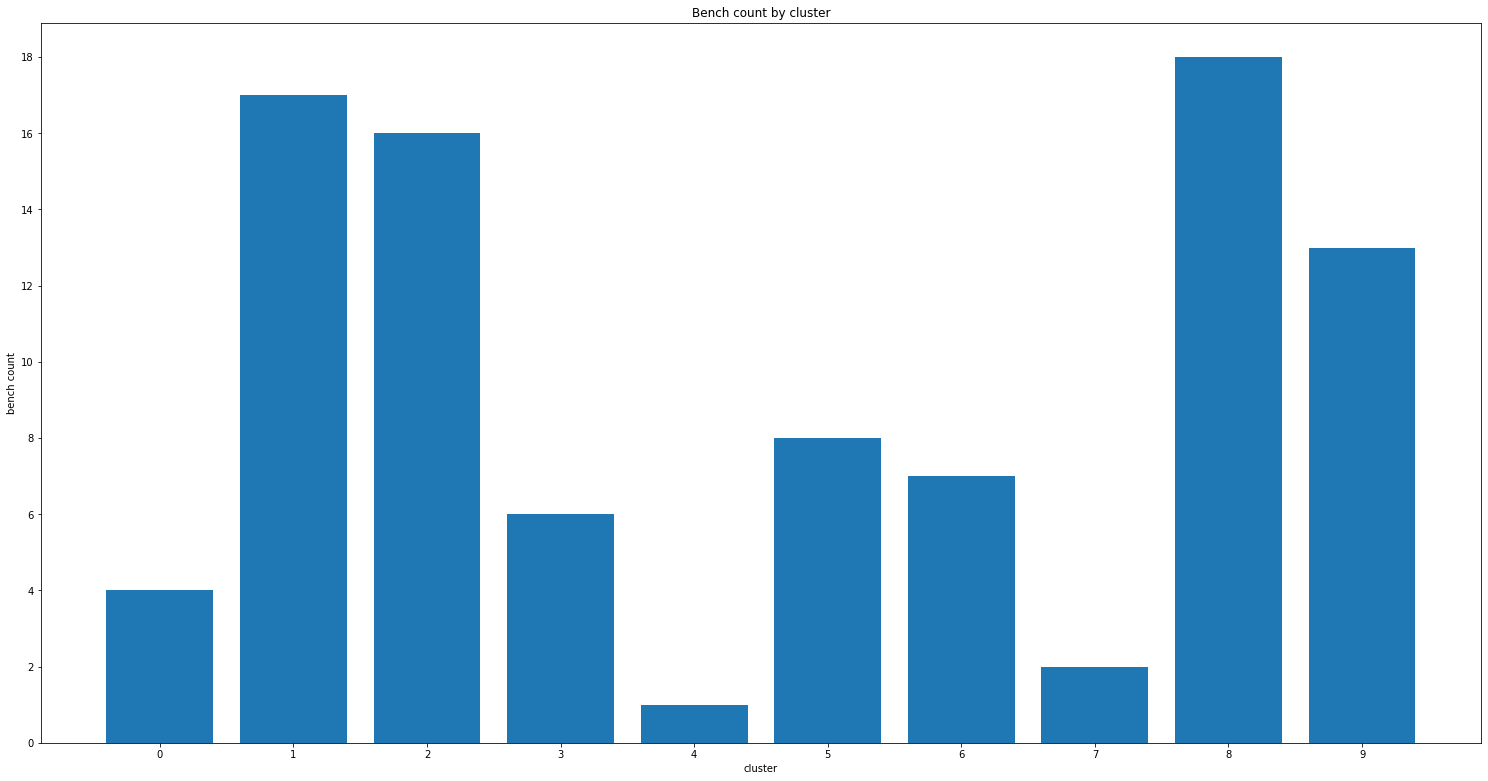

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cluster, bench_count)
ax.set_ylabel('bench count')
ax.set_xlabel('cluster')
ax.set_title('Bench count by cluster')
ax.set_xticks(cluster)
ax.set_yticks(np.arange(0, max(bench_count)+1,2))

plt.show()

In [ ]:
atm_count = avgTile["atm_count"]
cluster = avgTile["cluster"]

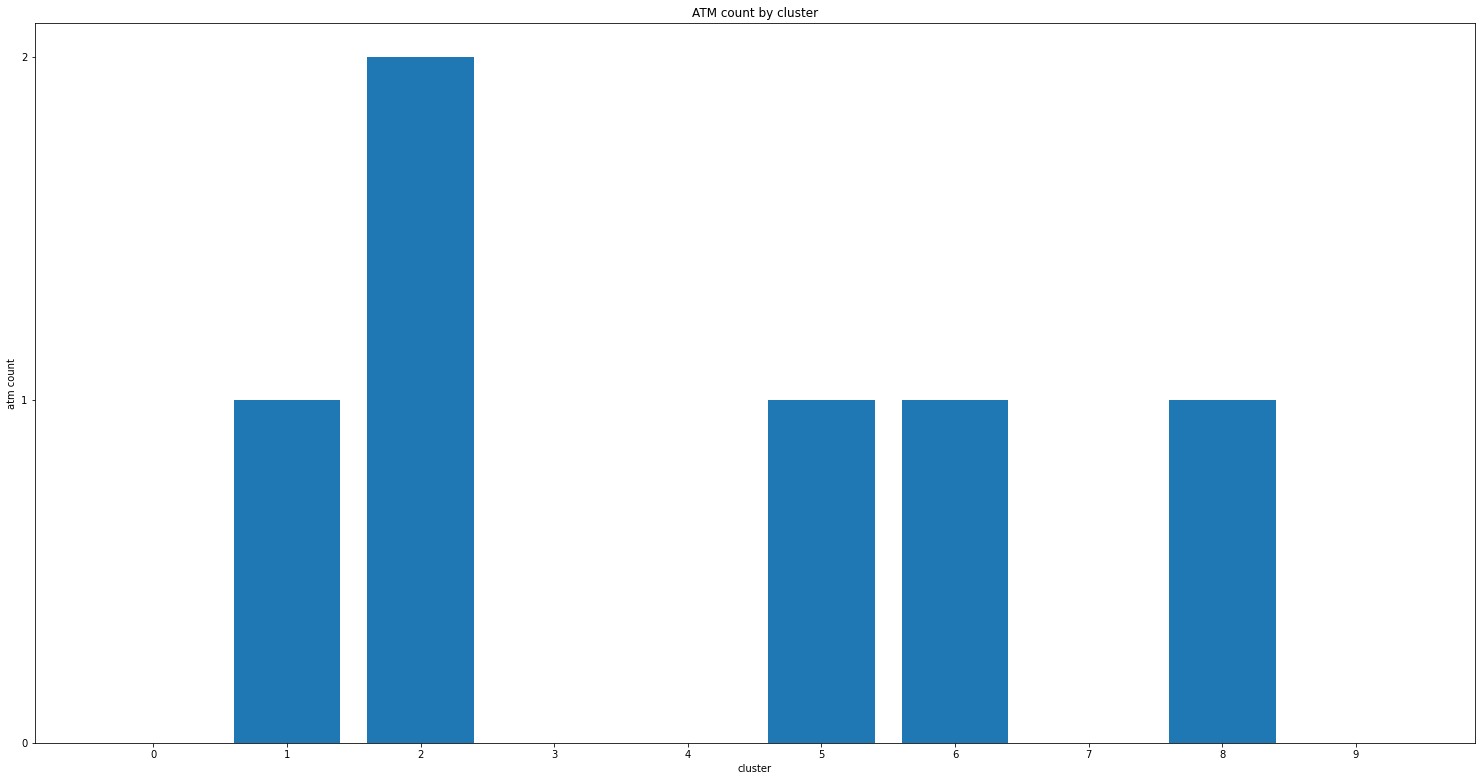

In [ ]:
import matplotlib.pyplot as plt
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(cluster, atm_count)
ax2.set_ylabel('atm count')
ax2.set_xlabel('cluster')
ax2.set_title('ATM count by cluster')
ax2.set_xticks(cluster)
ax2.set_yticks(np.arange(0, max(atm_count)+1,1))

plt.show()

All clusters and amenities together

In [ ]:
#avgTile = avgTile.drop(["cluster"], axis=1)
#tileArray = avgTile.to_numpy()
#tileArray

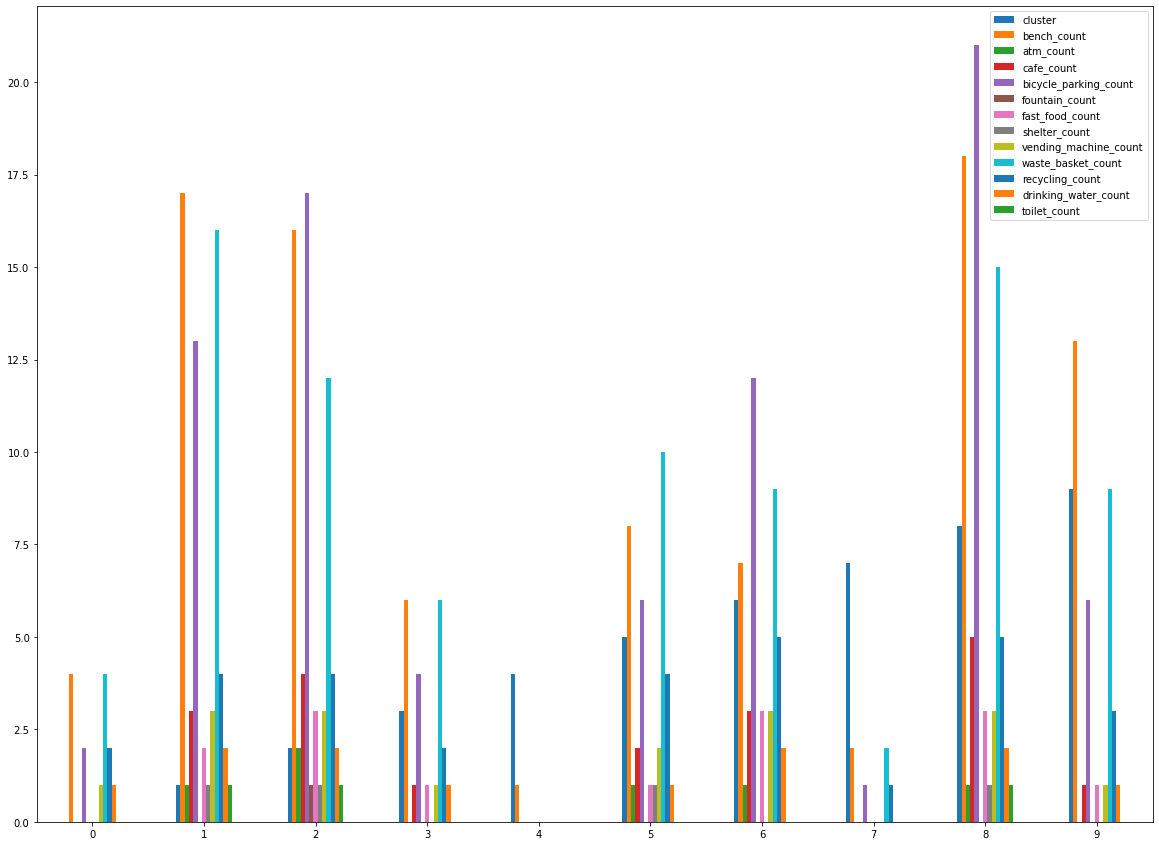

In [ ]:

ax = avgTile.plot.bar(rot=0 ,figsize=(20,15))
ax.legend(bbox_to_anchor=(1.0, 1.0))

# 03 RECOMMENDATION SYSTEM

## CALCULATING CURRENT DIFFERENCES

In [ ]:
## calculate different between average and current
for index, analyseTiles_row in allTilesCount.iterrows():
  amenities_row = avgTile.loc[analyseTiles_row['cluster_cat']]
  for column_names in ['bench_count', 'atm_count', 'cafe_count', 'bicycle_parking_count', 'fountain_count', 'fast_food_count', 'shelter_count', 'vending_machine_count', 'waste_basket_count', 'recycling_count', 'drinking_water_count', 'toilet_count']:
   allTilesCount.loc[index,column_names] = analyseTiles_row[column_names] - amenities_row[column_names]

In [ ]:
amenitiyDiff = allTilesCount
amenitiyDiff

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,geometry,tile_count,cluster_cat
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981...",1,4
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980...",1,4
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980...",1,4
3,-2.0,4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980...",1,7
4,-2.0,5,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979...",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,-1.0,1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40602 48.12194, 16.40601 48.11745...",1,4
1812,-2.0,1813,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,"POLYGON ((16.41273 48.12194, 16.41273 48.11744...",1,7
1813,-1.0,1814,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,"POLYGON ((16.41945 48.12194, 16.41944 48.11744...",1,7
1814,-2.0,1815,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,"POLYGON ((16.42616 48.12193, 16.42616 48.11743...",1,7


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenitiyDiff.geojson'
amenitiyDiff.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenitiyDiff.geojson", "r")
amenitiyDiff = gpd.read_file(json_file_grid)
amenitiyDiff.head(5)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


Percentage difference to get better understanding of extremes

In [ ]:
avgTile

,cluster,bench_count,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count
0,0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,0.0
1,1,17.0,1.0,3.0,13.0,0.0,2.0,1.0,3.0,16.0,4.0,2.0,1.0
2,2,16.0,2.0,4.0,17.0,1.0,3.0,1.0,3.0,12.0,4.0,2.0,1.0
3,3,6.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,6.0,2.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,8.0,1.0,2.0,6.0,0.0,1.0,1.0,2.0,10.0,4.0,1.0,0.0
6,6,7.0,1.0,3.0,12.0,0.0,3.0,0.0,3.0,9.0,5.0,2.0,0.0
7,7,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
8,8,18.0,1.0,5.0,21.0,0.0,3.0,1.0,3.0,15.0,5.0,2.0,1.0
9,9,13.0,0.0,1.0,6.0,0.0,1.0,0.0,1.0,9.0,3.0,1.0,0.0


In [ ]:
allTilesCountAmenities

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count,cluster_cat,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.40602 48.12194, 16.40601 48.11745..."
1812,0.0,1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.41273 48.12194, 16.41273 48.11744..."
1813,1.0,1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,7,"POLYGON ((16.41945 48.12194, 16.41944 48.11744..."
1814,0.0,1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,"POLYGON ((16.42616 48.12193, 16.42616 48.11743..."


In [ ]:
allTilesCount = allTilesCountAmenities

In [ ]:
## calculate percentage different between average and current
for index, analyseTiles_row in allTilesCount.iterrows():
  amenities_row = avgTile.loc[analyseTiles_row['cluster_cat']]
  for column_names in ['bench_count', 'atm_count', 'cafe_count', 'bicycle_parking_count', 'fountain_count', 'fast_food_count', 'shelter_count', 'vending_machine_count', 'waste_basket_count', 'recycling_count', 'drinking_water_count', 'toilet_count']:
   allTilesCount.loc[index,column_names] = (analyseTiles_row[column_names] / amenities_row[column_names]) * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [ ]:
allTilesCountPercentages = allTilesCount 

In [ ]:
allTilesCountPercentages

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count,cluster_cat,geometry
0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,0.0,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,"POLYGON ((16.40602 48.12194, 16.40601 48.11745..."
1812,0.0,1813,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1,7,"POLYGON ((16.41273 48.12194, 16.41273 48.11744..."
1813,50.0,1814,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,0.0,NaN,NaN,1,7,"POLYGON ((16.41945 48.12194, 16.41944 48.11744..."
1814,0.0,1815,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1,7,"POLYGON ((16.42616 48.12193, 16.42616 48.11743..."


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/allTilesCountPercentages.geojson'
allTilesCountPercentages.to_file(filepath_tag_geojson, driver='GeoJSON')

## DESCRIBING, SORTING AND CLEANING CLUSTERS

In [ ]:
amenityTotals = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/amenityTotals.csv')

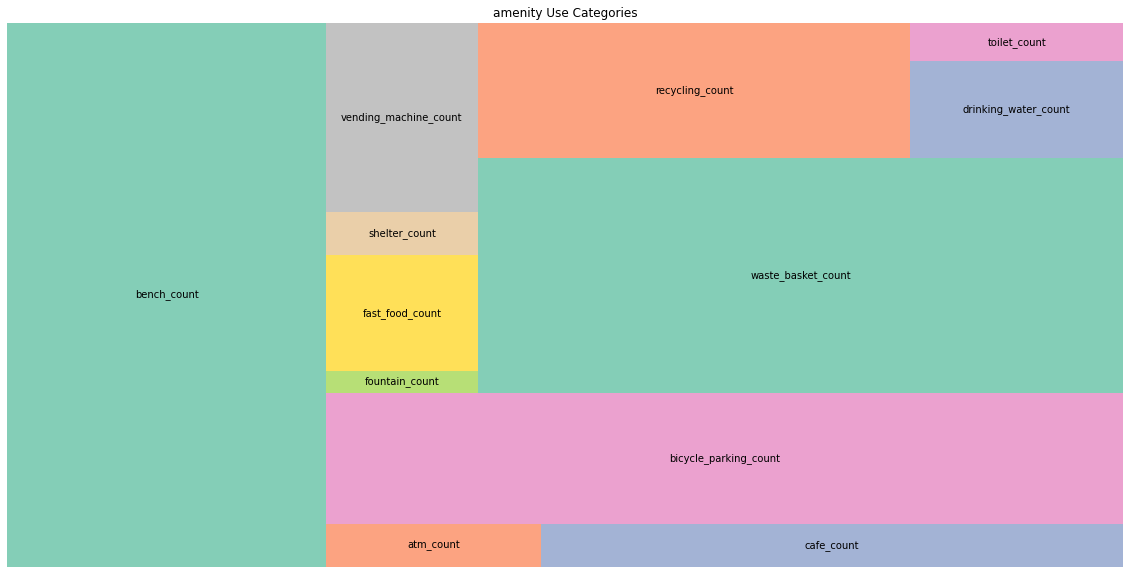

In [ ]:
#visualising amounts
plt.rcParams["figure.figsize"] = (20,10)
squarify.plot(sizes=amenityTotals['total'], label=amenityTotals['amenity'], alpha=.8, color=plt.cm.Set2.colors)
plt.axis('off')
plt.title("amenity Use Categories")
plt.show()

In [ ]:
amenityTotals

,amenity,total
0,bench_count,7811.0
1,atm_count,412.0
2,cafe_count,1116.0
3,bicycle_parking_count,4730.0
4,fountain_count,148.0
5,fast_food_count,791.0
6,shelter_count,295.0
7,vending_machine_count,1293.0
8,waste_basket_count,6836.0
9,recycling_count,2621.0


Dropping half the amenities

In [ ]:
allTilesCount = amenitiyDiff

In [ ]:
selectTilesCount = allTilesCount.drop(["cafe_count","fountain_count","shelter_count","recycling_count","drinking_water_count","toilet_count"], axis=1)
selectTilesCount


,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
...,...,...,...,...,...,...,...,...,...,...
1811,-1.0,1812,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.40602 48.12194, 16.40601 48.11745..."
1812,-2.0,1813,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41273 48.12194, 16.41273 48.11744..."
1813,-1.0,1814,0.0,-1.0,0.0,0.0,-1.0,1,7,"POLYGON ((16.41945 48.12194, 16.41944 48.11744..."
1814,-2.0,1815,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.42616 48.12193, 16.42616 48.11743..."


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/selectTilesCount.geojson'
selectTilesCount.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/selectTilesCount.geojson", "r")
selectTilesCount = gpd.read_file(json_file_grid)
selectTilesCount.head(5)

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


In [ ]:
selectTilesCount.describe()

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.0,1816.000000
mean,0.191630,908.500000,0.091410,-0.111233,0.059471,0.073238,0.083150,1.0,4.092511
std,9.284642,524.378362,0.709955,5.714489,1.216864,1.559695,6.749123,0.0,2.548316
min,-18.000000,1.000000,-2.000000,-21.000000,-3.000000,-3.000000,-16.000000,1.0,0.000000
25%,-3.000000,454.750000,0.000000,-2.000000,0.000000,-1.000000,-2.000000,1.0,3.000000
50%,-1.000000,908.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.000000
75%,0.000000,1362.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.000000
max,104.000000,1816.000000,10.000000,53.000000,14.000000,19.000000,68.000000,1.0,9.000000


In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(selectTilesCount["bench_count"])

In [ ]:
# cap outliers # 

In [ ]:
bench_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
bench_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)
atm_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
atm_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)
bicycle_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
bicycle_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)
food_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
food_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)
vending_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
vending_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)
waste_upper_limit = selectTilesCount["bench_count"].quantile(0.99).round(0)
waste_lower_limit = selectTilesCount["bench_count"].quantile(0.01).round(0)

In [ ]:
cappedSelectTilesCount = selectTilesCount.copy()
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= bench_upper_limit, "bench_count"] = bench_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= bench_lower_limit, "bench_count"] = bench_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= atm_upper_limit, "bench_count"] = atm_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= atm_lower_limit, "bench_count"] = atm_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= bench_upper_limit, "bench_count"] = bench_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= bench_lower_limit, "bench_count"] = bench_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= bicycle_upper_limit, "bench_count"] = bicycle_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= bicycle_lower_limit, "bench_count"] = bicycle_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= food_upper_limit, "bench_count"] = food_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= food_lower_limit, "bench_count"] = food_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= vending_upper_limit, "bench_count"] = vending_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= vending_lower_limit, "bench_count"] = vending_lower_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] >= waste_upper_limit, "bench_count"] = waste_upper_limit
cappedSelectTilesCount.loc[cappedSelectTilesCount["bench_count"] <= waste_lower_limit, "bench_count"] = waste_lower_limit
cappedSelectTilesCount

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
...,...,...,...,...,...,...,...,...,...,...
1811,-1.0,1812,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.40602 48.12194, 16.40601 48.11745..."
1812,-2.0,1813,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41273 48.12194, 16.41273 48.11744..."
1813,-1.0,1814,0.0,-1.0,0.0,0.0,-1.0,1,7,"POLYGON ((16.41945 48.12194, 16.41944 48.11744..."
1814,-2.0,1815,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.42616 48.12193, 16.42616 48.11743..."


In [ ]:
cappedSelectTilesCount.describe()

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.0,1816.000000
mean,-0.004956,908.500000,0.091410,-0.111233,0.059471,0.073238,0.083150,1.0,4.092511
std,7.797964,524.378362,0.709955,5.714489,1.216864,1.559695,6.749123,0.0,2.548316
min,-16.000000,1.000000,-2.000000,-21.000000,-3.000000,-3.000000,-16.000000,1.0,0.000000
25%,-3.000000,454.750000,0.000000,-2.000000,0.000000,-1.000000,-2.000000,1.0,3.000000
50%,-1.000000,908.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.000000
75%,0.000000,1362.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.000000
max,41.000000,1816.000000,10.000000,53.000000,14.000000,19.000000,68.000000,1.0,9.000000


In [ ]:
#%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/cappedSelectTilesCount.geojson'
cappedSelectTilesCount.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/voids.geojson", "r")
voids = gpd.read_file(json_file_grid)
voids.head()

,element_type,osmid,geometry
0,way,5075813,"POLYGON ((16.40048 48.21559, 16.40041 48.21563..."
1,way,5075929,"POLYGON ((16.39440 48.21664, 16.39435 48.21661..."
2,way,23524558,"POLYGON ((16.33004 48.18165, 16.33004 48.18167..."
3,way,27057404,"POLYGON ((16.42071 48.22839, 16.42048 48.22856..."
4,way,27497960,"POLYGON ((16.37194 48.20797, 16.37194 48.20798..."


## CLUSTER  ANALYSIS

In [ ]:
# print only certain clusters
cluster0 = cappedSelectTilesCount.loc[cappedSelectTilesCount['cluster_cat'] == 0]
cluster0.describe()

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.0
mean,-0.069401,964.864353,0.186120,-0.337539,0.189274,-0.271293,-0.217666,1.0,0.0
std,7.907390,453.644549,0.679768,4.385997,0.704065,1.541277,7.492608,0.0,0.0
min,-4.000000,64.000000,0.000000,-2.000000,0.000000,-1.000000,-4.000000,1.0,0.0
25%,-4.000000,652.000000,0.000000,-2.000000,0.000000,-1.000000,-4.000000,1.0,0.0
50%,-3.000000,912.000000,0.000000,-2.000000,0.000000,-1.000000,-3.000000,1.0,0.0
75%,0.000000,1389.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.0,0.0
max,41.000000,1749.000000,7.000000,44.000000,6.000000,11.000000,62.000000,1.0,0.0


In [ ]:
# print only certain clusters
cluster1 = cappedSelectTilesCount.loc[cappedSelectTilesCount['cluster_cat'] == 1]
cluster1.describe()

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.0
mean,-1.461538,848.476923,0.323077,-0.476923,0.430769,0.476923,0.261538,1.0,1.0
std,15.925684,332.656688,1.501121,11.759448,2.651469,3.961170,11.904932,0.0,0.0
min,-16.000000,218.000000,-1.000000,-13.000000,-2.000000,-3.000000,-16.000000,1.0,1.0
25%,-14.000000,556.000000,-1.000000,-8.000000,-2.000000,-2.000000,-8.000000,1.0,1.0
50%,-7.000000,919.000000,0.000000,-3.000000,0.000000,-1.000000,-2.000000,1.0,1.0
75%,5.000000,1075.000000,1.000000,3.000000,2.000000,1.000000,6.000000,1.0,1.0
max,41.000000,1569.000000,5.000000,53.000000,10.000000,19.000000,29.000000,1.0,1.0


In [ ]:
# print only certain clusters
cluster0 = cappedSelectTilesCount.loc[allTilesCount['cluster_cat'] == 0]
cluster0

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat,geometry
63,-4.0,64,0.0,-2.0,0.0,-1.0,-3.0,1,0,"POLYGON ((16.42647 48.29730, 16.42646 48.29280..."
64,-4.0,65,0.0,-1.0,0.0,0.0,-3.0,1,0,"POLYGON ((16.43321 48.29729, 16.43320 48.29280..."
65,-4.0,66,0.0,-2.0,0.0,1.0,-4.0,1,0,"POLYGON ((16.43995 48.29729, 16.43994 48.29279..."
76,4.0,77,1.0,2.0,0.0,1.0,0.0,1,0,"POLYGON ((16.41299 48.29281, 16.41298 48.28832..."
77,-4.0,78,0.0,-2.0,0.0,-1.0,-3.0,1,0,"POLYGON ((16.41973 48.29281, 16.41972 48.28831..."
...,...,...,...,...,...,...,...,...,...,...
1711,-4.0,1712,0.0,-2.0,0.0,-1.0,-2.0,1,0,"POLYGON ((16.34558 48.13995, 16.34558 48.13546..."
1718,-4.0,1719,0.0,-1.0,0.0,-1.0,-4.0,1,0,"POLYGON ((16.39260 48.13994, 16.39260 48.13544..."
1719,-4.0,1720,0.0,0.0,0.0,-1.0,-3.0,1,0,"POLYGON ((16.39932 48.13994, 16.39932 48.13544..."
1747,-4.0,1748,0.0,-2.0,0.0,0.0,-3.0,1,0,"POLYGON ((16.33886 48.13546, 16.33886 48.13096..."


In [ ]:
cluster0.describe()

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.0
mean,-0.069401,964.864353,0.186120,-0.337539,0.189274,-0.271293,-0.217666,1.0,0.0
std,7.907390,453.644549,0.679768,4.385997,0.704065,1.541277,7.492608,0.0,0.0
min,-4.000000,64.000000,0.000000,-2.000000,0.000000,-1.000000,-4.000000,1.0,0.0
25%,-4.000000,652.000000,0.000000,-2.000000,0.000000,-1.000000,-4.000000,1.0,0.0
50%,-3.000000,912.000000,0.000000,-2.000000,0.000000,-1.000000,-3.000000,1.0,0.0
75%,0.000000,1389.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.0,0.0
max,41.000000,1749.000000,7.000000,44.000000,6.000000,11.000000,62.000000,1.0,0.0


In [ ]:
cluster0Bench = cluster0["bench_count"]
cluster0Bench
max_value = cluster0Bench.max()
max_value

41.0

In [ ]:
min_value = cluster0Bench.min()
min_value

-4.0

Analysis of the recommended amount per cluster (makes sense? need to add custom policies to make relate more to cluster)

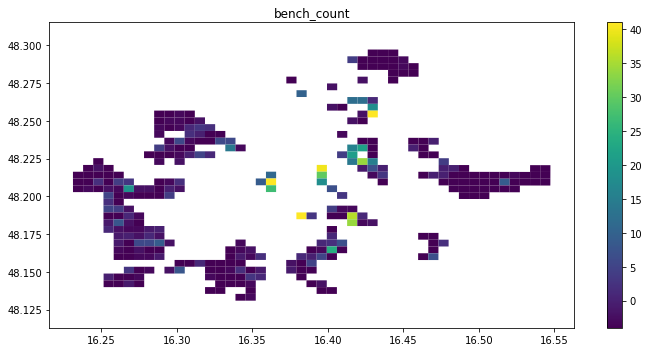

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='bench_count', legend=True, ax=ax1)
ax1.set_title('bench_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

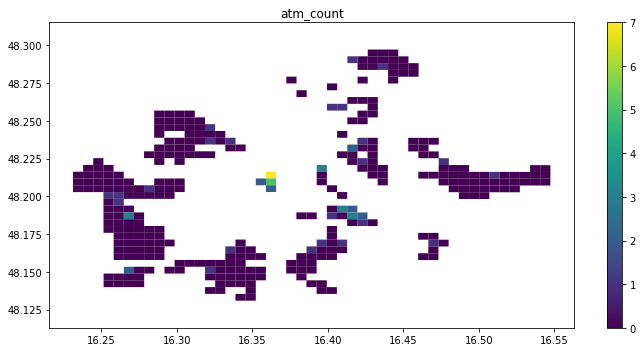

In [ ]:
cluster0Bench = cluster0["atm_count"]
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='atm_count', legend=True, ax=ax1)
ax1.set_title('atm_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

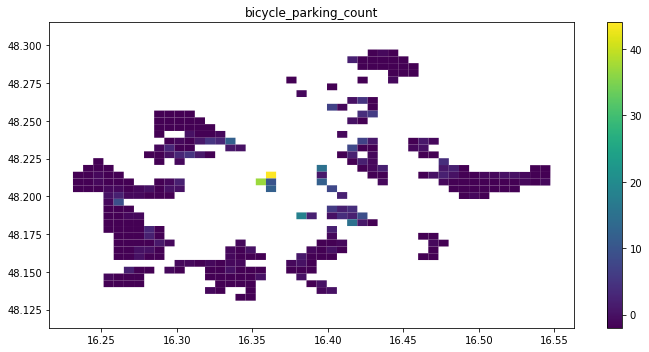

In [ ]:
cluster0Bench = cluster0["bicycle_parking_count"]
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='bicycle_parking_count', legend=True, ax=ax1)
ax1.set_title('bicycle_parking_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

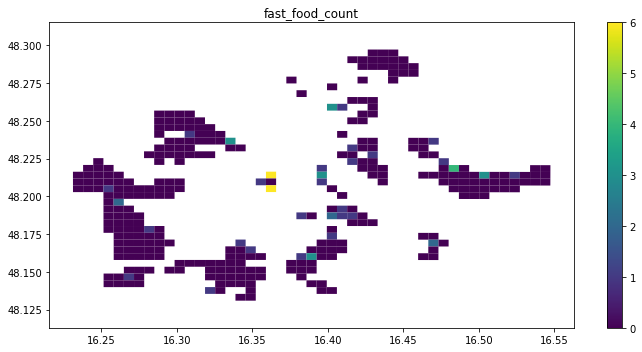

In [ ]:
cluster0Bench = cluster0["fast_food_count"]
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='fast_food_count', legend=True, ax=ax1)
ax1.set_title('fast_food_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

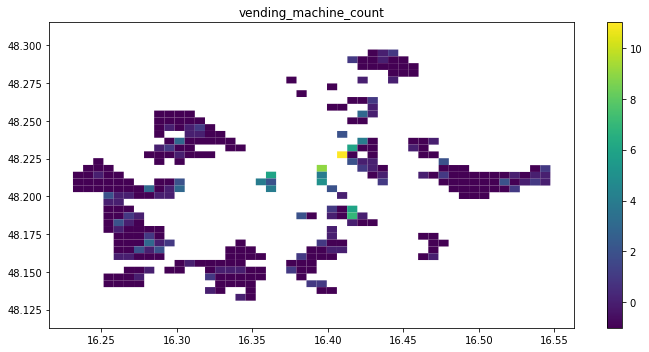

In [ ]:
cluster0Bench = cluster0["vending_machine_count"]
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='vending_machine_count', legend=True, ax=ax1)
ax1.set_title('vending_machine_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

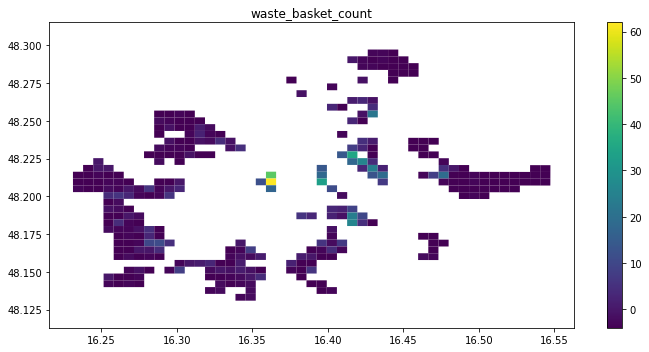

In [ ]:
cluster0Bench = cluster0["waste_basket_count"]
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

cluster0.plot(column='waste_basket_count', legend=True, ax=ax1)
ax1.set_title('waste_basket_count')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

# 04 VOID MATCHING

## DEMOGRAPHICS

In [5]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/densityGrid.geojson', "r")
densityGrid = gpd.read_file(json_file_grid)
densityGrid.head(5)

,popden12,geometry
0,1.45232,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,1.45232,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,1.45232,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,1.45232,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,1.45232,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


## AMENITIES

In [6]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/amenityGrid.geojson', "r")
amenityGrid = gpd.read_file(json_file_grid)
amenityGrid.head(5)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


## LANDUSE

In [7]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/landuseGrid.geojson', "r")
landuseGrid = gpd.read_file(json_file_grid)
landuseGrid.head(5)

,landcommercial_count,industrial_count,railway_count,residential_count,retail_count,landnature_count,geometry
0,0.0,0.0,0.0,0.0,0.0,20.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,0.0,0.0,0.0,0.0,22.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,0.0,0.0,0.0,0.0,14.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,0.0,0.0,0.0,0.0,1.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


## BUILDINGS

In [8]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/buildingGrid.geojson', "r")
buildingGrid = gpd.read_file(json_file_grid)
buildingGrid.head(5)

,entertainment_count,ID,commercial_count,education_count,food_count,healthcare_count,nature_count,residentialbuilding_count,transportation_count,geometry
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


## CLUSTERING

In [9]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/clusterGrid.geojson', "r")
clusterGrid = gpd.read_file(json_file_grid)
clusterGrid.head(5)

,cluster_cat,geometry
0,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."


## VOIDS AND RECOMENDATIONS

In [10]:
avgTile = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/avgAmenityTileCluster.csv')
avgTile = avgTile.drop(["Unnamed: 0"], axis=1)
avgTile

,cluster,bench_count,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count
0,0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,0.0
1,1,17.0,1.0,3.0,13.0,0.0,2.0,1.0,3.0,16.0,4.0,2.0,1.0
2,2,16.0,2.0,4.0,17.0,1.0,3.0,1.0,3.0,12.0,4.0,2.0,1.0
3,3,6.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,6.0,2.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,8.0,1.0,2.0,6.0,0.0,1.0,1.0,2.0,10.0,4.0,1.0,0.0
6,6,7.0,1.0,3.0,12.0,0.0,3.0,0.0,3.0,9.0,5.0,2.0,0.0
7,7,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
8,8,18.0,1.0,5.0,21.0,0.0,3.0,1.0,3.0,15.0,5.0,2.0,1.0
9,9,13.0,0.0,1.0,6.0,0.0,1.0,0.0,1.0,9.0,3.0,1.0,0.0


In [11]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/amenityDiff.geojson', "r")
amenityDiff = gpd.read_file(json_file_grid)
amenityDiff.head(10)

,bench_count,ID,atm_count,cafe_count,bicycle_parking_count,fountain_count,fast_food_count,shelter_count,vending_machine_count,waste_basket_count,recycling_count,drinking_water_count,toilet_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
5,-2.0,6,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.41978 48.32428, 16.41977 48.31979..."
6,-2.0,7,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.42652 48.32428, 16.42651 48.31978..."
7,4.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,4,"POLYGON ((16.37932 48.31981, 16.37932 48.31531..."
8,3.0,9,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.38606 48.31981, 16.38606 48.31531..."
9,-1.0,10,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,0.0,1,7,"POLYGON ((16.39280 48.31980, 16.39280 48.31531..."


In [12]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/voidsRecommendationPoly.geojson', "r")
voidsRecommendation = gpd.read_file(json_file_grid)
voidsRecommendation.head(10)

,ID,bench_count,atm_count,fast_food_count,waste_basket_count,cluster,bicycle_parking_count,vending_machine_count,geometry
0,1,17,3,5,10,7,5,3,"POLYGON ((16.40048 48.21559, 16.40041 48.21563..."
1,2,17,3,1,14,0,15,9,"POLYGON ((16.39440 48.21664, 16.39435 48.21661..."
2,3,40,4,5,26,1,2,4,"POLYGON ((16.33004 48.18165, 16.33004 48.18167..."
3,4,9,0,2,18,9,1,1,"POLYGON ((16.42071 48.22839, 16.42048 48.22856..."
4,5,41,10,6,54,5,27,15,"POLYGON ((16.37194 48.20797, 16.37194 48.20798..."
5,6,-1,0,-2,-1,1,-9,-1,"POLYGON ((16.41305 48.17421, 16.41290 48.17417..."
6,7,4,0,0,-6,3,0,-1,"POLYGON ((16.32597 48.16552, 16.32602 48.16557..."
7,8,7,3,1,14,0,15,9,"POLYGON ((16.39934 48.21706, 16.39923 48.21703..."
8,9,40,3,1,14,0,15,9,"POLYGON ((16.39765 48.21692, 16.39798 48.21690..."
9,10,40,3,1,14,0,15,9,"POLYGON ((16.39628 48.21688, 16.39629 48.21698..."


In [13]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/DataFiles/cappedSelectTilesCount.geojson', "r")
cappedSelectTilesCount = gpd.read_file(json_file_grid)
cappedSelectTilesCount.head(20)

,bench_count,ID,atm_count,bicycle_parking_count,fast_food_count,vending_machine_count,waste_basket_count,tile_count,cluster_cat,geometry
0,-1.0,1,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.38607 48.32430, 16.38606 48.31981..."
1,-1.0,2,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39281 48.32430, 16.39280 48.31980..."
2,-1.0,3,0.0,0.0,0.0,0.0,0.0,1,4,"POLYGON ((16.39955 48.32430, 16.39954 48.31980..."
3,-2.0,4,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.40629 48.32429, 16.40629 48.31980..."
4,-2.0,5,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41303 48.32429, 16.41303 48.31979..."
5,-2.0,6,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.41978 48.32428, 16.41977 48.31979..."
6,-2.0,7,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.42652 48.32428, 16.42651 48.31978..."
7,4.0,8,0.0,0.0,0.0,0.0,1.0,1,4,"POLYGON ((16.37932 48.31981, 16.37932 48.31531..."
8,3.0,9,0.0,-1.0,0.0,0.0,-1.0,1,7,"POLYGON ((16.38606 48.31981, 16.38606 48.31531..."
9,-1.0,10,0.0,-1.0,0.0,0.0,-2.0,1,7,"POLYGON ((16.39280 48.31980, 16.39280 48.31531..."


In [14]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/Studio/AnalysisData/voids.geojson', "r")
voids = gpd.read_file(json_file_grid)
voids.head(5)

,element_type,osmid,geometry
0,way,5075813,"POLYGON ((16.40048 48.21559, 16.40041 48.21563..."
1,way,5075929,"POLYGON ((16.39440 48.21664, 16.39435 48.21661..."
2,way,23524558,"POLYGON ((16.33004 48.18165, 16.33004 48.18167..."
3,way,27057404,"POLYGON ((16.42071 48.22839, 16.42048 48.22856..."
4,way,27497960,"POLYGON ((16.37194 48.20797, 16.37194 48.20798..."


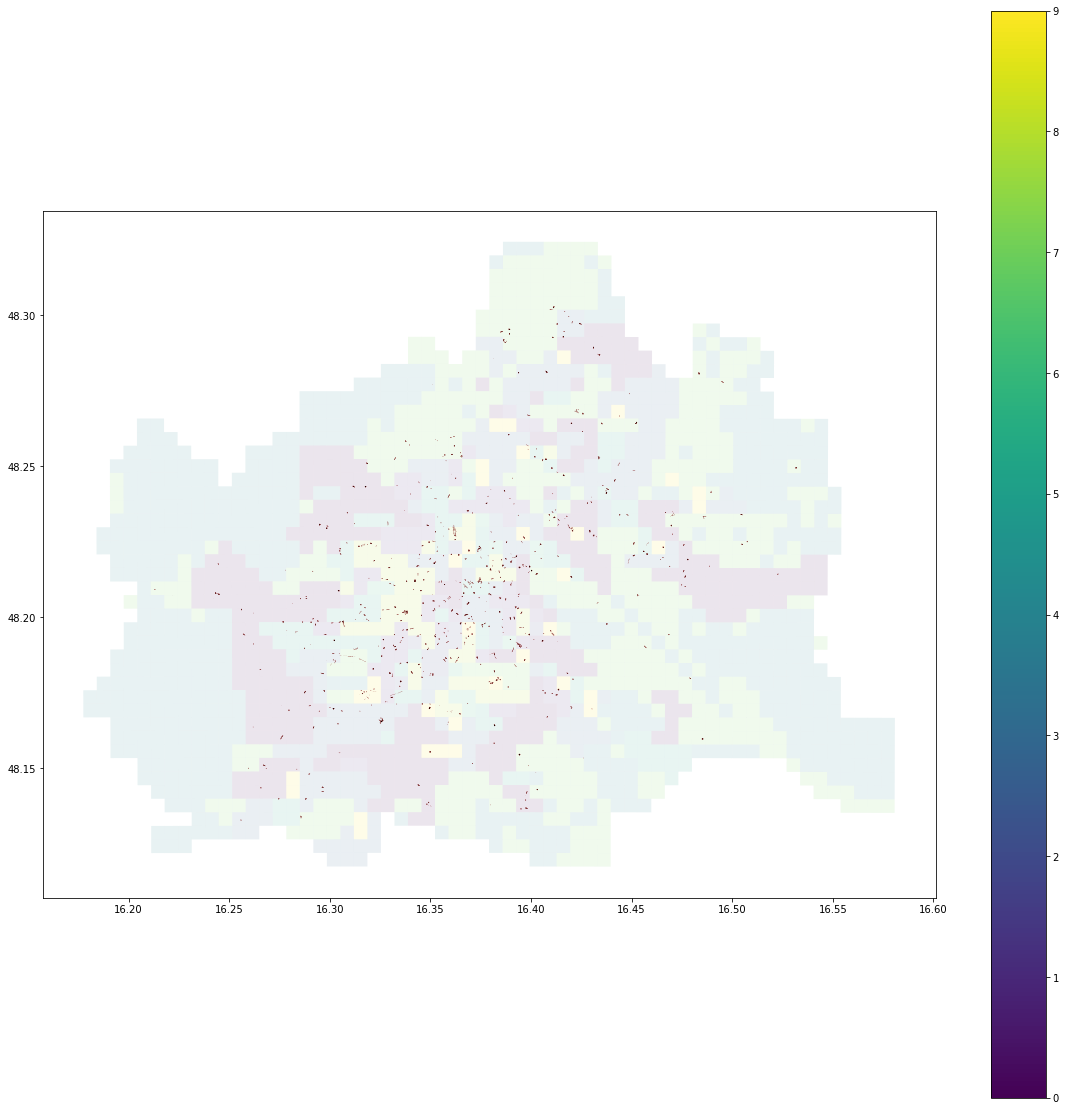

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
voids.plot(ax=ax,color='red',alpha=1 ,legend=True, zorder=2)  #FROM OPENDATA
voidsRecommendation.plot(ax=ax, color='black',zorder=3)  #FROM OSMNX
#clusterGrid.plot(ax=ax, color='blue',alpha=1,zorder=1)
clusterGrid.plot(column='cluster_cat', legend=True,alpha=0.1,zorder=1, ax=ax)
#ax.set_aspect('equal', adjustable='datalim')

#plt.tight_layout()
plt.show()


# 05 VISUALISATION

In [16]:
##PRIMARY FEATURES: AMENITIES

map_feat1 = folium.Map(location=[48.20, 16.37],tiles="Stamen Toner", zoom_start=12, max_zoom=18, min_zoom=12)

# Set up Choropleth map
folium.Choropleth(
geo_data=voidsRecommendation,
data=voidsRecommendation,
columns=['ID',"cluster"],
key_on="feature.properties.ID",
fill_color='YlGnBu_r',
fill_opacity=.5,
line_opacity=0.5,
legend_name="Cluster Category",
smooth_factor=0,
Highlight= True,
line_color = "#de268b",
name = "Cluster Cat",
show=False,
overlay=True,
nan_fill_color = "#575757"

).add_to(map_feat1)


# # Here we add cross-hatching (crossing lines) to display the Null values.
# nans = amen_DF[amen_DF["cluster_cat"].isnull()]['ID'].values
# gdf_nans = amen_DF[amen_DF['ID'].isin(nans)]
# sp = StripePattern(angle=45, color='grey', space_color='white')
# sp.add_to(map_feat1)
# folium.features.GeoJson(name="Click for cluster_cat NaN values",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(sample_map2)

# # We add a layer controller. 
# folium.LayerControl(collapsed=False).add_to(map_feat1)
#########################
#~Neil Adding Hover Functionality

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = voidsRecommendation,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ID','cluster','bench_count','atm_count','bicycle_parking_count','fast_food_count','vending_machine_count','waste_basket_count'],
        aliases=['ID','cluster','bench_count','atm_count','bicycle_parking_count','fast_food_count','vending_machine_count','waste_basket_count'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_feat1.add_child(NIL)
map_feat1.keep_in_front(NIL)


#########################
map_feat1

In [17]:
##PRIMARY FEATURES: AMENITIES

map_feat1 = folium.Map(location=[48.20, 16.37],tiles="Stamen Toner", zoom_start=12, max_zoom=18, min_zoom=12)

# Set up Choropleth map
folium.Choropleth(
geo_data=amenityDiff,
data=amenityDiff,
columns=['ID',"cluster_cat"],
key_on="feature.properties.ID",
fill_color='YlGnBu_r',
fill_opacity=.5,
line_opacity=0.5,
legend_name="Cluster Category",
smooth_factor=0,
Highlight= True,
line_color = "#de268b",
name = "Cluster Cat",
show=False,
overlay=True,
nan_fill_color = "#575757"

).add_to(map_feat1)


# # Here we add cross-hatching (crossing lines) to display the Null values.
# nans = amen_DF[amen_DF["cluster_cat"].isnull()]['ID'].values
# gdf_nans = amen_DF[amen_DF['ID'].isin(nans)]
# sp = StripePattern(angle=45, color='grey', space_color='white')
# sp.add_to(map_feat1)
# folium.features.GeoJson(name="Click for cluster_cat NaN values",data=gdf_nans, style_function=lambda x :{'fillPattern': sp},show=True).add_to(sample_map2)

# # We add a layer controller. 
# folium.LayerControl(collapsed=False).add_to(map_feat1)
#########################
#~Neil Adding Hover Functionality

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = amenityDiff,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ID','cluster_cat','bench_count','atm_count','cafe_count','bicycle_parking_count','fountain_count','fast_food_count','shelter_count','vending_machine_count','waste_basket_count','recycling_count','drinking_water_count','toilet_count'],
        aliases=['ID','Cluster Category','bench_count','atm_count','cafe_count','bicycle_parking_count','fountain_count','fast_food_count','shelter_count','vending_machine_count','waste_basket_count','recycling_count','drinking_water_count','toilet_count'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_feat1.add_child(NIL)
map_feat1.keep_in_front(NIL)


#########################
map_feat1



Output hidden; open in https://colab.research.google.com to view.